In [3]:
# Importation des biblioth√®ques n√©cessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [4]:
# Chargement des donn√©es
achats = pd.read_excel(r'C:\Users\MEDIA TEK\Desktop\achats_commande.xlsx')

In [5]:

achats.shape

(23107, 18)

In [6]:
#Affichage des 5 premiers lignes
achats.head(4)

Soci√©t√©  N¬∞commande Type commande               Code article  \
0        5    22000002            HS  HSDR0007                    
1        5    22000002            OR  P6311047                    
2        5    22000003            AC  M30511105                   
3        5    22000003            HS  HSDLI007                    

                                Article               Type article  Quantit√©  \
0  SRTJ du E2:E13530/11/2021.             Produit mati√®re premi√®re       1.0   
1         FUEL LOURD N¬∞2                         √ânergie/Carburant      30.0   
2          FILM THERMOR√âTRACTABLE NG 40¬µ                   Service   45000.0   
3         reparation palettes                              Service    3402.0   

   UM    Montant Centre de cout Date commande       Date r√©ception  \
0  UN    3081600        D051008    03/01/2022  2022-01-12 00:00:00   
1  TN   22276389          PR510    04/01/2022  2022-01-20 00:00:00   
2  KG  351000000          MP510    05/01/2022  2022-01-30 00:00:00   
3  UN   10206000       D0510055    03/01/2022  2022-01-15 00:00:00   

   dur√©e de livraion  d√©lai de livraison conformit√©  Code Fournisseur  \
0                  9                  25   Conforme           5006997   
1                 16                   8   Conforme           5005182   
2                 25                   4   Conforme           5006889   
3                 12                   3   Conforme           5007369   

   Nom Fournisseur    adresse  
0  Soci√©t√© Mohamed      Gafsa  
1   Soci√©t√© Gharbi     Nabeul  
2  Soci√©t√© Hammami  Tataouine  
3    Soci√©t√© Allah   Jendouba

In [7]:
# V√©rification des types de donn√©es
achats.dtypes


Soci√©t√©                 int64
N¬∞commande              int64
Type commande          object
Code article           object
Article                object
Type article           object
Quantit√©              float64
UM                     object
Montant                 int64
Centre de cout         object
Date commande          object
Date r√©ception         object
dur√©e de livraion       int64
d√©lai de livraison      int64
conformit√©             object
Code Fournisseur        int64
Nom Fournisseur        object
adresse                object
dtype: object

In [8]:
#Affichage des informations du DataFrame
achats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23107 entries, 0 to 23106
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Soci√©t√©             23107 non-null  int64  
 1   N¬∞commande          23107 non-null  int64  
 2   Type commande       23107 non-null  object 
 3   Code article        23107 non-null  object 
 4   Article             23107 non-null  object 
 5   Type article        23107 non-null  object 
 6   Quantit√©            23107 non-null  float64
 7   UM                  23107 non-null  object 
 8   Montant             23107 non-null  int64  
 9   Centre de cout      23107 non-null  object 
 10  Date commande       23107 non-null  object 
 11  Date r√©ception      23107 non-null  object 
 12  dur√©e de livraion   23107 non-null  int64  
 13  d√©lai de livraison  23107 non-null  int64  
 14  conformit√©          23107 non-null  object 
 15  Code Fournisseur    23107 non-null  int64  
 

In [9]:
#Affichage des 5 derni√©res lignes
achats.tail()

Soci√©t√©  N¬∞commande Type commande               Code article  \
23102        5    24900731            OR  HSCLN0015                   
23103        5    24900731            OR  HSCLN0015                   
23104        5    24900732            OR  HSCLN0014                   
23105        5    24900733            OR  HSCLN0032                   
23106        5   922000015            OR  P5611013                    

                             Article  Type article  Quantit√©  UM  Montant  \
23102  frais de participation              Service       2.0  PI  1344538   
23103  hebergement                         Service       2.0  PI   280374   
23104  Abonnement salle de sport           Service       1.0  PI   873000   
23105  disque dur externe SSD 512 go      Mat√©riel       1.0  PI     1000   
23106  COLLIER DE SERRAGE 8/14            Mat√©riel      30.0  PI    19980   

      Centre de cout Date commande       Date r√©ception  dur√©e de livraion  \
23102        D051008    24/10/2024           31/10/2024                  7   
23103        D051008    24/10/2024           31/10/2024                  7   
23104        D051008    24/10/2024           31/10/2024                  7   
23105        D051007    24/10/2024           31/10/2024                  7   
23106          PR510    05/01/2022  2022-01-08 00:00:00                  3   

       d√©lai de livraison conformit√©  Code Fournisseur      Nom Fournisseur  \
23102                  25   Conforme            559911  Soci√©t√© Ben Mabrouk   
23103                  25   Conforme            559911  Soci√©t√© Ben Mabrouk   
23104                  25   Conforme            559911  Soci√©t√© Ben Mabrouk   
23105                  50   Conforme            550645    Soci√©t√© Ben naser   
23106                   8   Conforme           5005182       Soci√©t√© Gharbi   

           adresse  
23102  Sidi Bouzid  
23103    Kasserine  
23104      Bizerte  
23105    Kasserine  
23106        Tunis

In [10]:
# V√©rification des valeurs manquantes
achats.isnull().sum()

Soci√©t√©               0
N¬∞commande            0
Type commande         0
Code article          0
Article               0
Type article          0
Quantit√©              0
UM                    0
Montant               0
Centre de cout        0
Date commande         0
Date r√©ception        0
dur√©e de livraion     0
d√©lai de livraison    0
conformit√©            0
Code Fournisseur      0
Nom Fournisseur       0
adresse               0
dtype: int64

In [11]:
# V√©rification des doublons
achats.duplicated().sum()

np.int64(24)

In [12]:
#Suppression des doublons
achats = achats.drop_duplicates()



In [13]:
# V√©rification des doublons
achats.duplicated().sum()

np.int64(0)

In [14]:
achats.shape

(23083, 18)

In [15]:
# Conversion des dates en format datetime
achats['Date commande'] = pd.to_datetime(achats['Date commande'], dayfirst=True)
achats['Date r√©ception'] = pd.to_datetime(achats['Date r√©ception'], dayfirst=True)

In [16]:
print(achats['Type article'].unique())

['Produit mati√®re premi√®re' '√ânergie/Carburant' 'Service' 'Mat√©riel'
 'Produit emballage' 'Fourniture de bureau' 'Produit nettoyage'
 'Habillement']


In [17]:
achats

Soci√©t√©  N¬∞commande Type commande               Code article  \
0            5    22000002            HS  HSDR0007                    
1            5    22000002            OR  P6311047                    
2            5    22000003            AC  M30511105                   
3            5    22000003            HS  HSDLI007                    
4            5    22000003            OR  P9523007                    
...        ...         ...           ...                        ...   
23102        5    24900731            OR  HSCLN0015                   
23103        5    24900731            OR  HSCLN0015                   
23104        5    24900732            OR  HSCLN0014                   
23105        5    24900733            OR  HSCLN0032                   
23106        5   922000015            OR  P5611013                    

                                    Article               Type article  \
0      SRTJ du E2:E13530/11/2021.             Produit mati√®re premi√®re   
1             FUEL LOURD N¬∞2                         √ânergie/Carburant   
2              FILM THERMOR√âTRACTABLE NG 40¬µ                   Service   
3             reparation palettes                              Service   
4             Glasse de niv Type A N¬∞7 A/JTS                  Mat√©riel   
...                                      ...                       ...   
23102         frais de participation                           Service   
23103         hebergement                                      Service   
23104         Abonnement salle de sport                        Service   
23105         disque dur externe SSD 512 go                   Mat√©riel   
23106         COLLIER DE SERRAGE 8/14                         Mat√©riel   

       Quantit√©  UM    Montant Centre de cout Date commande Date r√©ception  \
0           1.0  UN    3081600        D051008    2022-01-03     2022-01-12   
1          30.0  TN   22276389          PR510    2022-01-04     2022-01-20   
2       45000.0  KG  351000000          MP510    2022-01-05     2022-01-30   
3        3402.0  UN   10206000       D0510055    2022-01-03     2022-01-15   
4           2.0  PC    2054800          PR510    2022-01-04     2022-01-10   
...         ...  ..        ...            ...           ...            ...   
23102       2.0  PI    1344538        D051008    2024-10-24     2024-10-31   
23103       2.0  PI     280374        D051008    2024-10-24     2024-10-31   
23104       1.0  PI     873000        D051008    2024-10-24     2024-10-31   
23105       1.0  PI       1000        D051007    2024-10-24     2024-10-31   
23106      30.0  PI      19980          PR510    2022-01-05     2022-01-08   

       dur√©e de livraion  d√©lai de livraison conformit√©  Code Fournisseur  \
0                      9                  25   Conforme           5006997   
1                     16                   8   Conforme           5005182   
2                     25                   4   Conforme           5006889   
3                     12                   3   Conforme           5007369   
4                      6                   8   Conforme           5005182   
...                  ...                 ...        ...               ...   
23102                  7                  25   Conforme            559911   
23103                  7                  25   Conforme            559911   
23104                  7                  25   Conforme            559911   
23105                  7                  50   Conforme            550645   
23106                  3                   8   Conforme           5005182   

           Nom Fournisseur      adresse  
0          Soci√©t√© Mohamed        Gafsa  
1           Soci√©t√© Gharbi       Nabeul  
2          Soci√©t√© Hammami    Tataouine  
3            Soci√©t√© Allah     Jendouba  
4           Soci√©t√© Gharbi        Gab√®s  
...                    ...          ...  
23102  Soci√©t√© Ben Mabrouk  Sidi Bouzid  
23103  Soci√©t√© Ben Mabrouk    Kass

In [18]:
# Data Preparation
# Dictionnaire de conversion vers kilogrammes
conversion_factors = {
    'UN': 1,   
    'TN': 1000, 
    'KG': 1,   
    'PC': 1,   
    'LT': 1,   
    'RA': 0.5, 
    'PI': 1,   
    'PA': 20,  
    'BT': 0.5, 
    'MI': 1,   
    'MT': 0.5, 
    'CT': 5,   
    'PQ': 0.2, 
    'PT': 10,  
    'EA': 1,   
    'KT': 5,   
    'RO': 0.1, 
    'GR': 0.001
}

In [19]:
# Fonction de normalisation
def normalize_quantity(row):
    um = row['UM']
    quantity = row['Quantit√©']
    
    # Appliquer le facteur de conversion si disponible
    if um in conversion_factors:
        return quantity * conversion_factors[um]
    else:
        return None

In [20]:
# Ajout de la colonne Quantit√©_kg
achats['quantit√©'] = achats.apply(normalize_quantity, axis=1)

In [21]:
# Affichage des donn√©es apr√®s normalisation
achats[['Code article', 'Article ', 'Quantit√©', 'UM', 'quantit√©']].head(20)

Code article                               Article   \
0   HSDR0007                   SRTJ du E2:E13530/11/2021.              
1   P6311047                          FUEL LOURD N¬∞2                   
2   M30511105                          FILM THERMOR√âTRACTABLE NG 40¬µ   
3   HSDLI007                          reparation palettes              
4   P9523007                          Glasse de niv Type A N¬∞7 A/JTS   
5   M21501039                         CARTON INTERCALAIRE KRAFT 250G   
6   HSDLI003                          transport beurre"landor"         
7   HSDT0020                          Capteur pression r√©f1089049252   
8   M30511034                         FILM ETIRABLE TRANSMANUEL L:50   
9   M30511031                         FILM ETIRORETRACTABLETRANSPAR    
10  HSDR0009                          FA21/238457                      
11  HSDR0009                          FA21/238457                      
12  HSDR0009                          FA21/238457                      
13  HSDR0009                          FA21/238457                      
14  HSDR0009                          FA21/238457                      
15  HSDR0009                          FA21/238457                      
16  HSDT0003                          ausculation par cam√©ra forage    
17  MCFRB0098                         PAIRE DE CISEAUX                 
18  MCFRB0126                         RAME PAPIER EXTRA BLANC          
19  MCFRB0019                         CAHIER REGISTRE 200 PAGES        

    Quantit√©  UM  quantit√©  
0       1.00  UN      1.00  
1      30.00  TN  30000.00  
2   45000.00  KG  45000.00  
3    3402.00  UN   3402.00  
4       2.00  PC      2.00  
5   40000.00  KG  40000.00  
6       1.00  UN      1.00  
7       1.00  UN      1.00  
8    1500.00  KG   1500.00  
9    1000.00  KG   1000.00  
10   1232.92  LT   1232.92  
11    744.64  LT    744.64  
12    527.08  LT    527.08  
13      1.00  LT      1.00  
14      1.00  LT      1.00  
15      1.00  LT      1.00  
16      1.00  UN      1.00  
17      6.00  UN      6.00  
18     16.00  RA      8.00  
19      5.00  UN      5.00

In [22]:
achats[achats['UM'] == 'MT'].head()

Soci√©t√©  N¬∞commande Type commande               Code article  \
323        5    22000146            OR  P9912074                    
745        5    22000072            OR  P2122003                    
746        5    22000072            OR  P2122005                    
747        5    22000072            OR  P2122006                    
748        5    22000072            OR  P2122009                    

                           Article  Type article  Quantit√©  UM  Montant  \
323  TUBE D'AIR TRANSPARENT DIA4X1      Mat√©riel      30.0  MT   361917   
745  TUBE POLYAMIDE BLEU                Mat√©riel     400.0  MT   810000   
746  TUBE POLYAMIDE BLEU DIA 08         Mat√©riel     200.0  MT   477000   
747  TUB-POLYAMIDESEMI RIG DIA10X8      Mat√©riel     200.0  MT   378000   
748  TUB-POLYAMIDE SEMI RIG DIA 12      Mat√©riel      50.0  MT   314235   

    Centre de cout Date commande Date r√©ception  dur√©e de livraion  \
323          PR510    2022-01-28     2022-02-05                  8   
745          PR510    2022-01-14     2022-01-20                  6   
746          PR510    2022-01-14     2022-01-20                  6   
747          PR510    2022-01-14     2022-01-20                  6   
748          PR510    2022-01-14     2022-01-20                  6   

     d√©lai de livraison conformit√©  Code Fournisseur Nom Fournisseur  \
323                   8   Conforme           5005182  Soci√©t√© Gharbi   
745                   8   Conforme           5005182  Soci√©t√© Gharbi   
746                   8   Conforme           5005182  Soci√©t√© Gharbi   
747                   8   Conforme           5005182  Soci√©t√© Gharbi   
748                   8   Conforme           5005182  Soci√©t√© Gharbi   

       adresse  quantit√©  
323       B√©ja      15.0  
745      Tunis     200.0  
746      Gafsa     100.0  
747      Tunis     100.0  
748  Tataouine      25.0

In [23]:
# Calcul du co√ªt unitaire pour chaque ligne
achats['Co√ªt unitaire'] = achats['Montant'] / achats['quantit√©']



In [24]:
#v√©rification est effectu√©e pour s'assurer que les divisions par z√©ro ou les infinies ne se produisent pas
achats['Co√ªt unitaire'] = achats['Co√ªt unitaire'].replace([np.inf, -np.inf], np.nan).fillna(0)  # G√©rer les divisions par z√©ro

In [25]:
# Affichage des r√©sultats
achats[['Code article', 'Article ', 'Quantit√©', 'UM', 'quantit√©', 'Co√ªt unitaire']].head(20)

Code article                               Article   \
0   HSDR0007                   SRTJ du E2:E13530/11/2021.              
1   P6311047                          FUEL LOURD N¬∞2                   
2   M30511105                          FILM THERMOR√âTRACTABLE NG 40¬µ   
3   HSDLI007                          reparation palettes              
4   P9523007                          Glasse de niv Type A N¬∞7 A/JTS   
5   M21501039                         CARTON INTERCALAIRE KRAFT 250G   
6   HSDLI003                          transport beurre"landor"         
7   HSDT0020                          Capteur pression r√©f1089049252   
8   M30511034                         FILM ETIRABLE TRANSMANUEL L:50   
9   M30511031                         FILM ETIRORETRACTABLETRANSPAR    
10  HSDR0009                          FA21/238457                      
11  HSDR0009                          FA21/238457                      
12  HSDR0009                          FA21/238457                      
13  HSDR0009                          FA21/238457                      
14  HSDR0009                          FA21/238457                      
15  HSDR0009                          FA21/238457                      
16  HSDT0003                          ausculation par cam√©ra forage    
17  MCFRB0098                         PAIRE DE CISEAUX                 
18  MCFRB0126                         RAME PAPIER EXTRA BLANC          
19  MCFRB0019                         CAHIER REGISTRE 200 PAGES        

    Quantit√©  UM  quantit√©  Co√ªt unitaire  
0       1.00  UN      1.00   3.081600e+06  
1      30.00  TN  30000.00   7.425463e+02  
2   45000.00  KG  45000.00   7.800000e+03  
3    3402.00  UN   3402.00   3.000000e+03  
4       2.00  PC      2.00   1.027400e+06  
5   40000.00  KG  40000.00   1.945000e+03  
6       1.00  UN      1.00   4.500000e+05  
7       1.00  UN      1.00   0.000000e+00  
8    1500.00  KG   1500.00   6.200000e+03  
9    1000.00  KG   1000.00   7.500000e+03  
10   1232.92  LT   1232.92   1.534000e+03  
11    744.64  LT    744.64   1.691000e+03  
12    527.08  LT    527.08   1.358001e+03  
13      1.00  LT      1.00   7.437400e+04  
14      1.00  LT      1.00   3.103800e+04  
15      1.00  LT      1.00   5.204100e+04  
16      1.00  UN      1.00   0.000000e+00  
17      6.00  UN      6.00   1.850000e+03  
18     16.00  RA      8.00   2.700000e+04  
19      5.00  UN      5.00   5.900000e+03

In [26]:
# Conversion de la colonne "conformit√©" en valeurs num√©riques (1 pour "Conforme", 0 pour "Non conforme")
achats['conformit√©'] = achats['conformit√©'].apply(lambda x: 1 if x == 'Conforme' else 0)

In [27]:
achats.head(8)

Soci√©t√©  N¬∞commande Type commande               Code article  \
0        5    22000002            HS  HSDR0007                    
1        5    22000002            OR  P6311047                    
2        5    22000003            AC  M30511105                   
3        5    22000003            HS  HSDLI007                    
4        5    22000003            OR  P9523007                    
5        5    22000004            AC  M21501039                   
6        5    22000004            HS  HSDLI003                    
7        5    22000004            OR  HSDT0020                    

                                Article               Type article  Quantit√©  \
0  SRTJ du E2:E13530/11/2021.             Produit mati√®re premi√®re       1.0   
1         FUEL LOURD N¬∞2                         √ânergie/Carburant      30.0   
2          FILM THERMOR√âTRACTABLE NG 40¬µ                   Service   45000.0   
3         reparation palettes                              Service    3402.0   
4         Glasse de niv Type A N¬∞7 A/JTS                  Mat√©riel       2.0   
5         CARTON INTERCALAIRE KRAFT 250G         Produit emballage   40000.0   
6         transport beurre"landor"                         Service       1.0   
7         Capteur pression r√©f1089049252                  Mat√©riel       1.0   

   UM    Montant Centre de cout Date commande Date r√©ception  \
0  UN    3081600        D051008    2022-01-03     2022-01-12   
1  TN   22276389          PR510    2022-01-04     2022-01-20   
2  KG  351000000          MP510    2022-01-05     2022-01-30   
3  UN   10206000       D0510055    2022-01-03     2022-01-15   
4  PC    2054800          PR510    2022-01-04     2022-01-10   
5  KG   77800000          MP510    2022-01-07     2022-01-31   
6  UN     450000       D0510055    2022-01-03     2022-01-17   
7  UN          0       D0510010    2022-01-04     2022-01-10   

   dur√©e de livraion  d√©lai de livraison  conformit√©  Code Fournisseur  \
0                  9                  25           1           5006997   
1                 16                   8           1           5005182   
2                 25                   4           1           5006889   
3                 12                   3           1           5007369   
4                  6                   8           1           5005182   
5                 24                   4           1           5007196   
6                 14                   3           1           5005954   
7                  6                  10           0            550737   

   Nom Fournisseur    adresse  quantit√©  Co√ªt unitaire  
0  Soci√©t√© Mohamed      Gafsa       1.0   3.081600e+06  
1   Soci√©t√© Gharbi     Nabeul   30000.0   7.425463e+02  
2  Soci√©t√© Hammami  Tataouine   45000.0   7.800000e+03  
3    Soci√©t√© Allah   Jendouba    3402.0   3.000000e+03  
4   Soci√©t√© Gharbi      Gab√®s       2.0   1.027400e+06  
5      Soci√©t√© Ali     K√©bili   40000.0   1.945000e+03  
6    Soci√©t√© Dridi   Monastir       1.0   4.500000e+05  
7   Soci√©t√© Cherif    Siliana       1.0   0.000000e+00

In [28]:
# Calcul du nombre total de commandes et du nombre de commandes conformes par fournisseur
conformance_rate = achats.groupby('Code Fournisseur')['conformit√©'].agg(
    Nombre_commandes_conformes='sum',  # Somme des commandes conformes
    Nombre_total_commandes='count'    # Compte total des commandes
).reset_index()

In [29]:
# Calcul du taux de conformit√© en pourcentage
conformance_rate['Taux de conformit√© (%)'] = (
    conformance_rate['Nombre_commandes_conformes'] / 
    conformance_rate['Nombre_total_commandes'] * 
    100
)

In [30]:
# Fusionner le taux de conformit√© avec le DataFrame principal
achats = achats.merge(conformance_rate[['Code Fournisseur', 'Taux de conformit√© (%)']], 
                 on='Code Fournisseur', 
                 how='left')

In [31]:
achats[['Code Fournisseur', 'Nom Fournisseur', 'conformit√©', 'Taux de conformit√© (%)']].head(20)

Code Fournisseur  Nom Fournisseur  conformit√©  Taux de conformit√© (%)
0            5006997  Soci√©t√© Mohamed           1              100.000000
1            5005182   Soci√©t√© Gharbi           1               72.143532
2            5006889  Soci√©t√© Hammami           1              100.000000
3            5007369    Soci√©t√© Allah           1              100.000000
4            5005182   Soci√©t√© Gharbi           1               72.143532
5            5007196      Soci√©t√© Ali           1              100.000000
6            5005954    Soci√©t√© Dridi           1              100.000000
7             550737   Soci√©t√© Cherif           0               89.845095
8            5005716    Soci√©t√© Ayari           1              100.000000
9            5005716    Soci√©t√© Ayari           1              100.000000
10           5007091    Soci√©t√© Ahmed           1              100.000000
11           5007091    Soci√©t√© Ahmed           1              100.000000
12           5007091    Soci√©t√© Ahmed           1              100.000000
13           5007091    Soci√©t√© Ahmed           1              100.000000
14           5007091    Soci√©t√© Ahmed           1              100.000000
15           5007091    Soci√©t√© Ahmed           1              100.000000
16            550737   Soci√©t√© Cherif           0               89.845095
17           5005814    Soci√©t√© Sassi           1              100.000000
18           5005814    Soci√©t√© Sassi           1              100.000000
19           5005814    Soci√©t√© Sassi           1              100.000000

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\3847884355.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de conformit√© (%)'].apply(


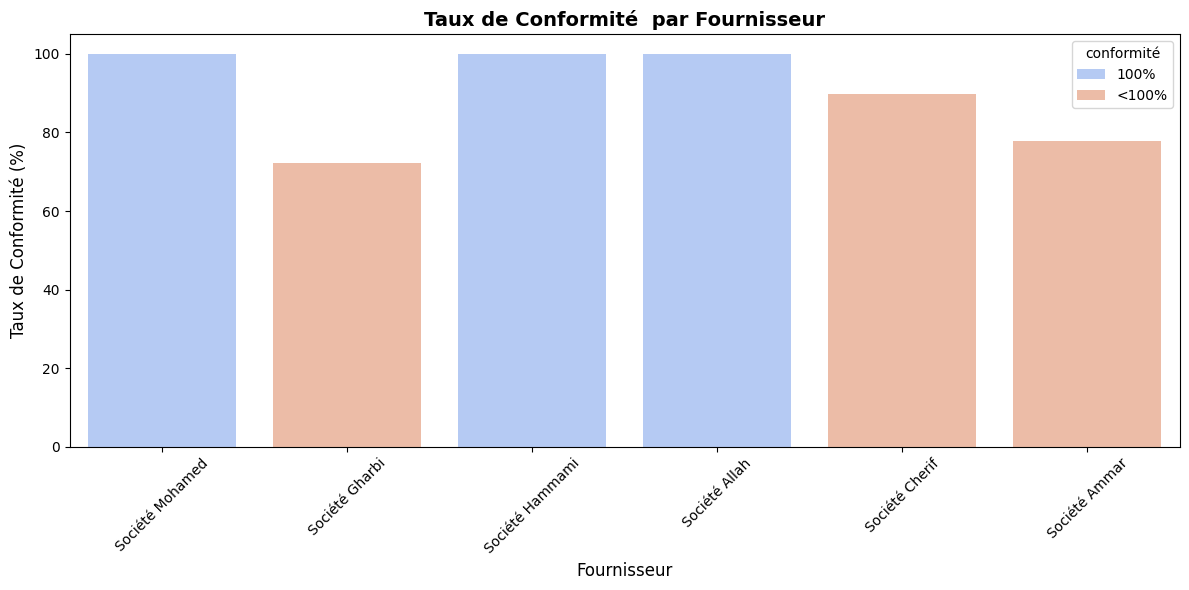

In [32]:
# Filtrer les fournisseurs et articles avec taux de conformit√© 100% ou inf√©rieur
conformite_100 = achats[achats['Taux de conformit√© (%)'] == 100]
conformite_inferieur = achats[achats['Taux de conformit√© (%)'] < 100]

# S√©lectionner un sous-ensemble (ex : 3 fournisseurs avec conformit√© 100% et 3 avec inf√©rieur)
fournisseurs_100 = conformite_100['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux 100%
fournisseurs_inferieur = conformite_inferieur['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux < 100%

# Cr√©er un sous-ensemble avec ces fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_100, fournisseurs_inferieur])

# Filtrer les donn√©es pour ne garder que ces fournisseurs
achats_filtr√©s = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Cr√©er une nouvelle colonne pour d√©finir les cat√©gories 100% ou <100%
achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de conformit√© (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique √† barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Taux de conformit√© (%)', hue='conformit√©', data=achats_filtr√©s, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Conformit√©  par Fournisseur', fontsize=14, fontweight='bold')
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Taux de Conformit√© (%)', fontsize=12)

# Rotation des labels pour la lisibilit√©
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\1420406845.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de conformit√© (%)'].apply(


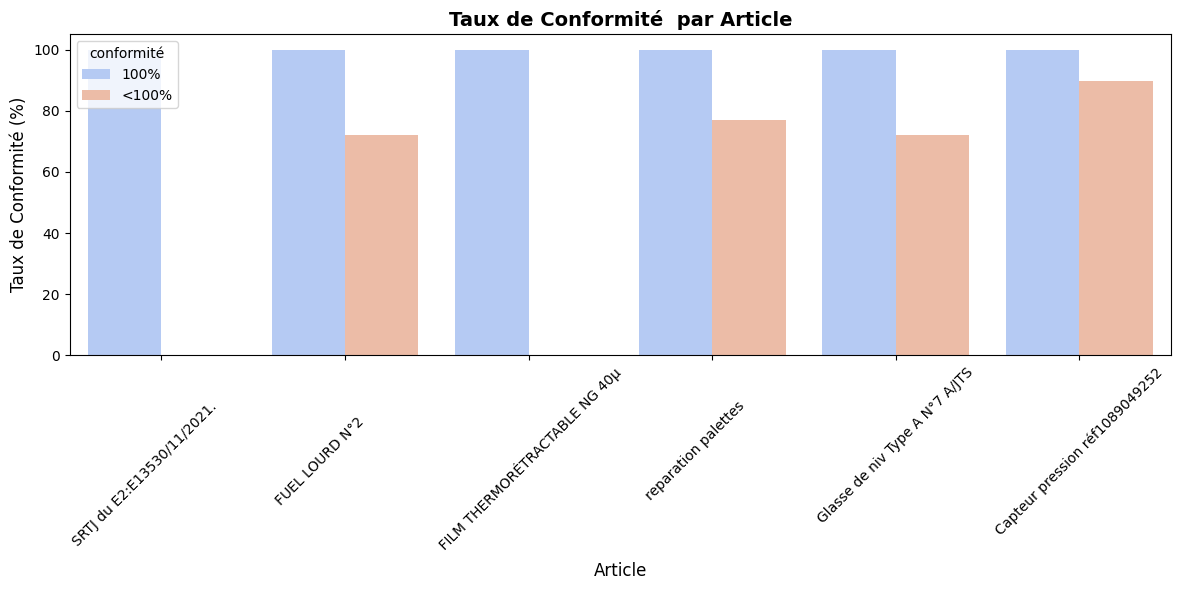

In [33]:

# Filtrer les fournisseurs et articles avec taux de conformit√© 100% ou inf√©rieur
conformite_100 = achats[achats['Taux de conformit√© (%)'] == 100]
conformite_inferieur = achats[achats['Taux de conformit√© (%)'] < 100]

# S√©lectionner un sous-ensemble (ex : 3 articles avec conformit√© 100% et 3 avec inf√©rieur)
articles_100 = conformite_100['Article '].unique()[:3]  # 3 articles avec taux 100%
articles_inferieur = conformite_inferieur['Article '].unique()[:3]  # 3 articles avec taux < 100%

# Cr√©er un sous-ensemble avec ces articles
articles_selectionnes = np.concatenate([articles_100, articles_inferieur])

# Filtrer les donn√©es pour ne garder que ces articles
achats_filtr√©s = achats[achats['Article '].isin(articles_selectionnes)]

# Cr√©er une nouvelle colonne pour d√©finir les cat√©gories 100% ou <100%
achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de conformit√© (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique √† barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Article ', y='Taux de conformit√© (%)', hue='conformit√©', data=achats_filtr√©s, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Conformit√©  par Article', fontsize=14, fontweight='bold')
plt.xlabel('Article', fontsize=12)
plt.ylabel('Taux de Conformit√© (%)', fontsize=12)

# Rotation des labels pour la lisibilit√©
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()








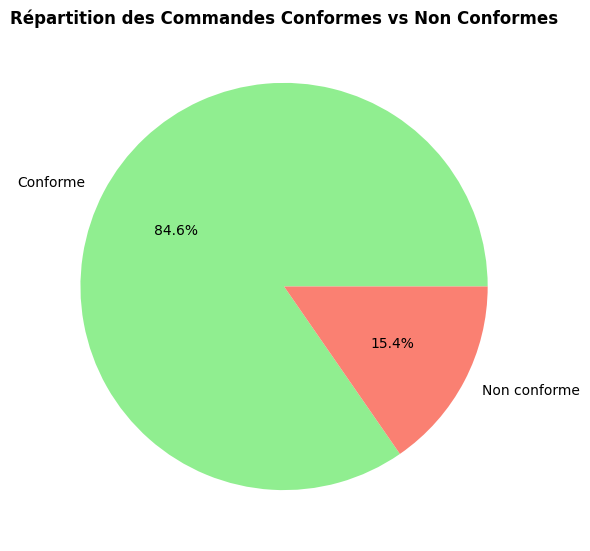

In [34]:
# Calculer le nombre de commandes conformes et non conformes
conforme_count = achats['conformit√©'].value_counts()

# Tracer un diagramme circulaire
plt.figure(figsize=(6, 6))
plt.pie(conforme_count, labels=['Conforme', 'Non conforme'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('R√©partition des Commandes Conformes vs Non Conformes', fontweight='bold')
plt.tight_layout()
plt.show()

In [35]:
# Calcul de l'√©cart de d√©lai
achats['√âcart de d√©lai'] = achats['dur√©e de livraion'] - achats['d√©lai de livraison']

In [36]:
achats.head()

Soci√©t√©  N¬∞commande Type commande               Code article  \
0        5    22000002            HS  HSDR0007                    
1        5    22000002            OR  P6311047                    
2        5    22000003            AC  M30511105                   
3        5    22000003            HS  HSDLI007                    
4        5    22000003            OR  P9523007                    

                                Article               Type article  Quantit√©  \
0  SRTJ du E2:E13530/11/2021.             Produit mati√®re premi√®re       1.0   
1         FUEL LOURD N¬∞2                         √ânergie/Carburant      30.0   
2          FILM THERMOR√âTRACTABLE NG 40¬µ                   Service   45000.0   
3         reparation palettes                              Service    3402.0   
4         Glasse de niv Type A N¬∞7 A/JTS                  Mat√©riel       2.0   

   UM    Montant Centre de cout  ... dur√©e de livraion d√©lai de livraison  \
0  UN    3081600        D051008  ...                 9                 25   
1  TN   22276389          PR510  ...                16                  8   
2  KG  351000000          MP510  ...                25                  4   
3  UN   10206000       D0510055  ...                12                  3   
4  PC    2054800          PR510  ...                 6                  8   

   conformit√©  Code Fournisseur  Nom Fournisseur    adresse quantit√©  \
0           1           5006997  Soci√©t√© Mohamed      Gafsa      1.0   
1           1           5005182   Soci√©t√© Gharbi     Nabeul  30000.0   
2           1           5006889  Soci√©t√© Hammami  Tataouine  45000.0   
3           1           5007369    Soci√©t√© Allah   Jendouba   3402.0   
4           1           5005182   Soci√©t√© Gharbi      Gab√®s      2.0   

  Co√ªt unitaire  Taux de conformit√© (%)  √âcart de d√©lai  
0  3.081600e+06              100.000000             -16  
1  7.425463e+02               72.143532               8  
2  7.800000e+03              100.000000              21  
3  3.000000e+03              100.000000               9  
4  1.027400e+06               72.143532              -2  

[5 rows x 22 columns]

In [37]:
# Cr√©er une nouvelle colonne pour indiquer si le d√©lai est respect√© (0 ou positif) ou en retard (n√©gatif)
achats['Statut Livraison'] = np.where(achats['√âcart de d√©lai'] > 0, 'Retard', 'Respect√©')

In [38]:
achats.head()

Soci√©t√©  N¬∞commande Type commande               Code article  \
0        5    22000002            HS  HSDR0007                    
1        5    22000002            OR  P6311047                    
2        5    22000003            AC  M30511105                   
3        5    22000003            HS  HSDLI007                    
4        5    22000003            OR  P9523007                    

                                Article               Type article  Quantit√©  \
0  SRTJ du E2:E13530/11/2021.             Produit mati√®re premi√®re       1.0   
1         FUEL LOURD N¬∞2                         √ânergie/Carburant      30.0   
2          FILM THERMOR√âTRACTABLE NG 40¬µ                   Service   45000.0   
3         reparation palettes                              Service    3402.0   
4         Glasse de niv Type A N¬∞7 A/JTS                  Mat√©riel       2.0   

   UM    Montant Centre de cout  ... d√©lai de livraison conformit√©  \
0  UN    3081600        D051008  ...                 25          1   
1  TN   22276389          PR510  ...                  8          1   
2  KG  351000000          MP510  ...                  4          1   
3  UN   10206000       D0510055  ...                  3          1   
4  PC    2054800          PR510  ...                  8          1   

   Code Fournisseur  Nom Fournisseur    adresse  quantit√© Co√ªt unitaire  \
0           5006997  Soci√©t√© Mohamed      Gafsa       1.0  3.081600e+06   
1           5005182   Soci√©t√© Gharbi     Nabeul   30000.0  7.425463e+02   
2           5006889  Soci√©t√© Hammami  Tataouine   45000.0  7.800000e+03   
3           5007369    Soci√©t√© Allah   Jendouba    3402.0  3.000000e+03   
4           5005182   Soci√©t√© Gharbi      Gab√®s       2.0  1.027400e+06   

  Taux de conformit√© (%)  √âcart de d√©lai  Statut Livraison  
0             100.000000             -16          Respect√©  
1              72.143532               8            Retard  
2             100.000000              21            Retard  
3             100.000000               9            Retard  
4              72.143532              -2          Respect√©  

[5 rows x 23 columns]

<Figure size 1200x600 with 0 Axes>

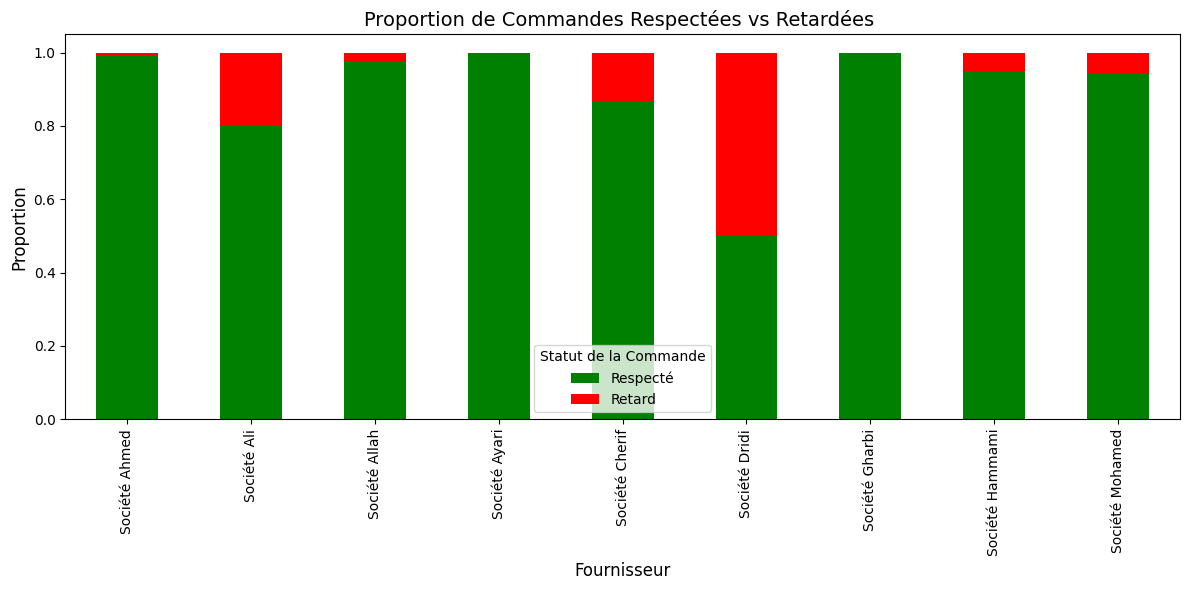

In [39]:


# S√©lectionner quelques fournisseurs avec des retards et d'autres respectant les d√©lais
fournisseurs_retard = achats[achats['Statut Livraison'] == 'Retard']['Nom Fournisseur'].unique()[:5]  # S√©lectionner 5 fournisseurs en retard
fournisseurs_respecte = achats[achats['Statut Livraison'] == 'Respect√©']['Nom Fournisseur'].unique()[:5]  # S√©lectionner 5 fournisseurs respect√©s

# Combiner les deux sous-ensembles de fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_retard, fournisseurs_respecte])

# Filtrer les donn√©es pour ne garder que ces fournisseurs
achats_filtr√©s = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Calculer la proportion de respect / retard par fournisseur
status_proportion = achats_filtr√©s.groupby(['Nom Fournisseur', 'Statut Livraison']).size().unstack(fill_value=0)
status_proportion = status_proportion.div(status_proportion.sum(axis=1), axis=0)  # Normaliser

# Tracer le graphique √† barres empil√©es
plt.figure(figsize=(12, 6))
status_proportion.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(12, 6))

# Ajouter un titre et des labels
plt.title('Proportion de Commandes Respect√©es vs Retard√©es ', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Proportion', fontsize=12)

# Rotation des labels pour la lisibilit√©
plt.xticks(rotation=90)

# Ajouter une l√©gende
plt.legend(title='Statut de la Commande', labels=['Respect√©', 'Retard'])

# Afficher le graphique
plt.tight_layout()
plt.show()



In [40]:
#nombre de commandes par fournisseur
commande_count_by_supplier = achats['Code Fournisseur'].value_counts().reset_index()
commande_count_by_supplier.columns = ['Code Fournisseur', 'Nombre de commandes']

achats = achats.merge(commande_count_by_supplier, on='Code Fournisseur', how='left')

In [41]:
achats.head()

Soci√©t√©  N¬∞commande Type commande               Code article  \
0        5    22000002            HS  HSDR0007                    
1        5    22000002            OR  P6311047                    
2        5    22000003            AC  M30511105                   
3        5    22000003            HS  HSDLI007                    
4        5    22000003            OR  P9523007                    

                                Article               Type article  Quantit√©  \
0  SRTJ du E2:E13530/11/2021.             Produit mati√®re premi√®re       1.0   
1         FUEL LOURD N¬∞2                         √ânergie/Carburant      30.0   
2          FILM THERMOR√âTRACTABLE NG 40¬µ                   Service   45000.0   
3         reparation palettes                              Service    3402.0   
4         Glasse de niv Type A N¬∞7 A/JTS                  Mat√©riel       2.0   

   UM    Montant Centre de cout  ... conformit√© Code Fournisseur  \
0  UN    3081600        D051008  ...          1          5006997   
1  TN   22276389          PR510  ...          1          5005182   
2  KG  351000000          MP510  ...          1          5006889   
3  UN   10206000       D0510055  ...          1          5007369   
4  PC    2054800          PR510  ...          1          5005182   

   Nom Fournisseur    adresse  quantit√©  Co√ªt unitaire Taux de conformit√© (%)  \
0  Soci√©t√© Mohamed      Gafsa       1.0   3.081600e+06             100.000000   
1   Soci√©t√© Gharbi     Nabeul   30000.0   7.425463e+02              72.143532   
2  Soci√©t√© Hammami  Tataouine   45000.0   7.800000e+03             100.000000   
3    Soci√©t√© Allah   Jendouba    3402.0   3.000000e+03             100.000000   
4   Soci√©t√© Gharbi      Gab√®s       2.0   1.027400e+06              72.143532   

  √âcart de d√©lai  Statut Livraison  Nombre de commandes  
0            -16          Respect√©                   17  
1              8            Retard                 8472  
2             21            Retard                   20  
3              9            Retard                   43  
4             -2          Respect√©                 8472  

[5 rows x 24 columns]

In [42]:
# Fusionner les donn√©es pour r√©cup√©rer le Nom Fournisseur
commande_count_by_supplier = pd.merge(commande_count_by_supplier, achats[['Code Fournisseur', 'Nom Fournisseur']].drop_duplicates(), on='Code Fournisseur', how='left')

# V√©rifiez que 'Nom Fournisseur' a bien √©t√© ajout√©
print(commande_count_by_supplier.head())


   Code Fournisseur  Nombre de commandes  Nom Fournisseur
0           5005182                 8472   Soci√©t√© Gharbi
1           5005839                 3229  Soci√©t√© Belhadj
2           5005138                  671     Soci√©t√© Nasr
3            550737                  581   Soci√©t√© Cherif
4           5008737                  410   Soci√©t√© Ayachi


C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\125779846.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


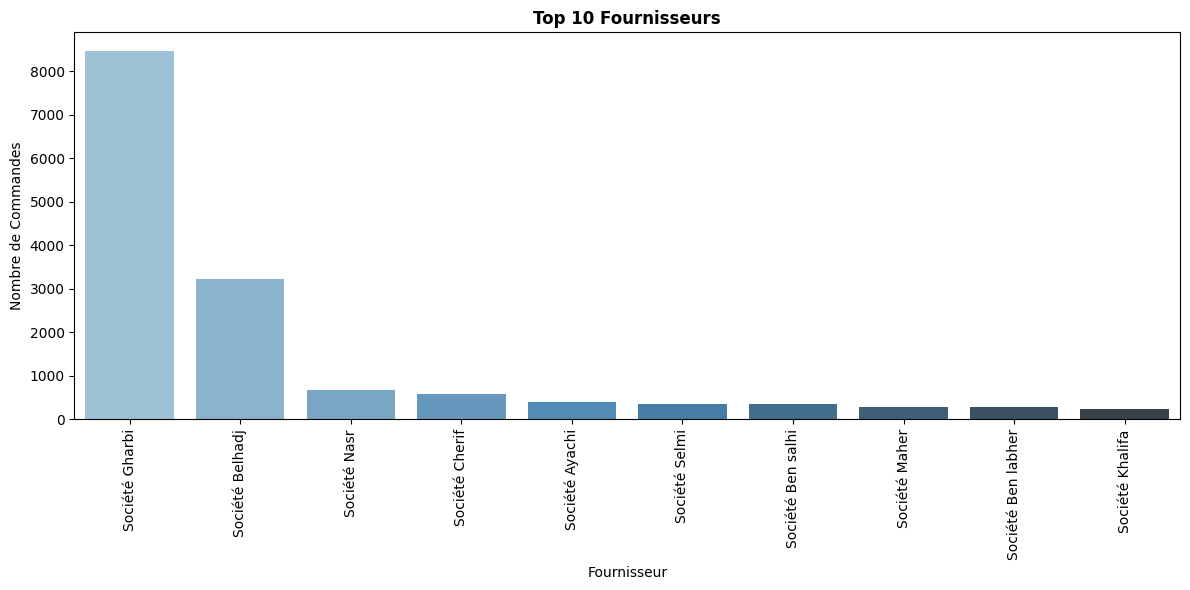

In [43]:
# Trier w s√©lectionner les 10 principaux fournisseurs par nombre de commandes
top_suppliers = commande_count_by_supplier.sort_values(by='Nombre de commandes', ascending=False).head(10)

# Tracer le diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Nom Fournisseur',
    y='Nombre de commandes',
    data=top_suppliers,
    palette='Blues_d'
)
plt.title('Top 10 Fournisseurs', fontweight='bold')
plt.xlabel('Fournisseur')
plt.ylabel('Nombre de Commandes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


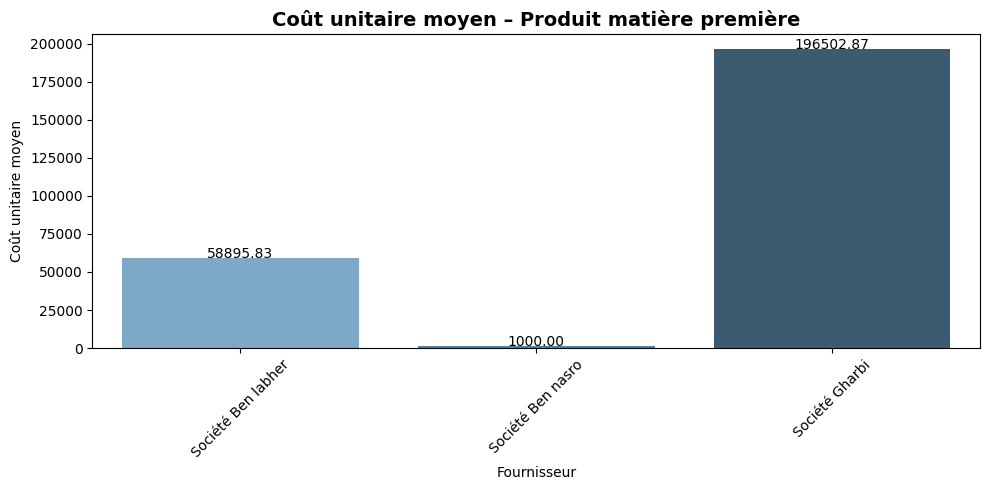

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


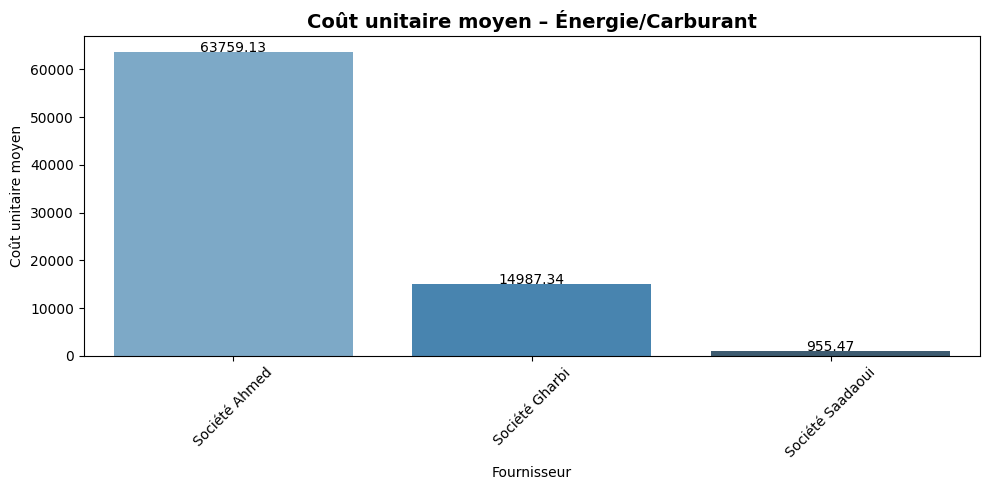

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


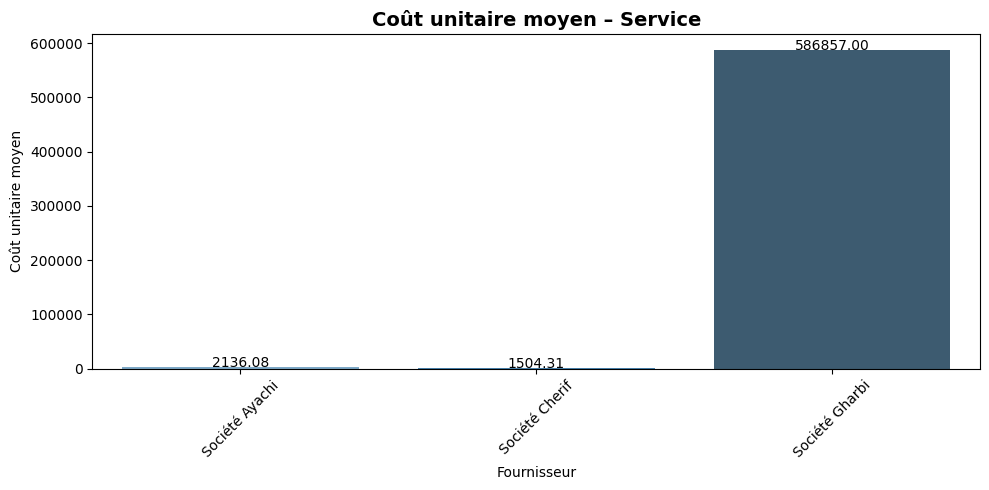

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


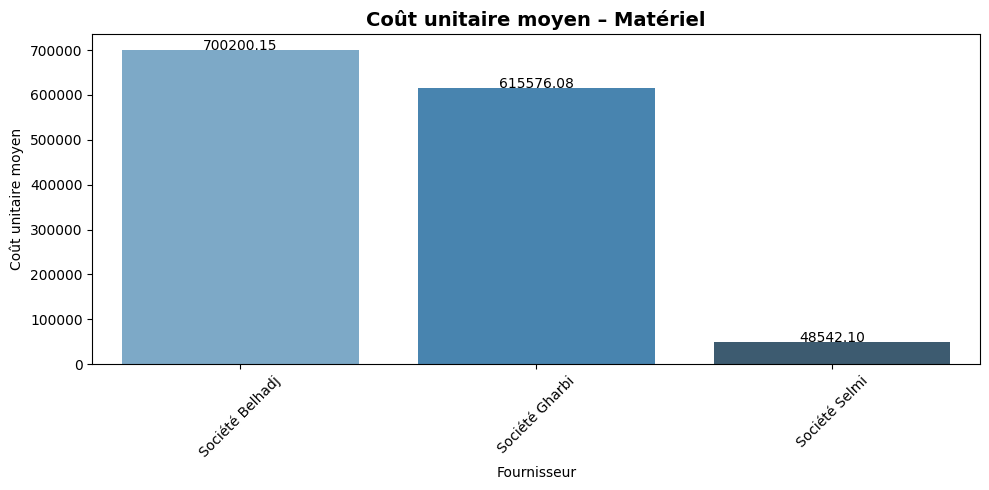

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


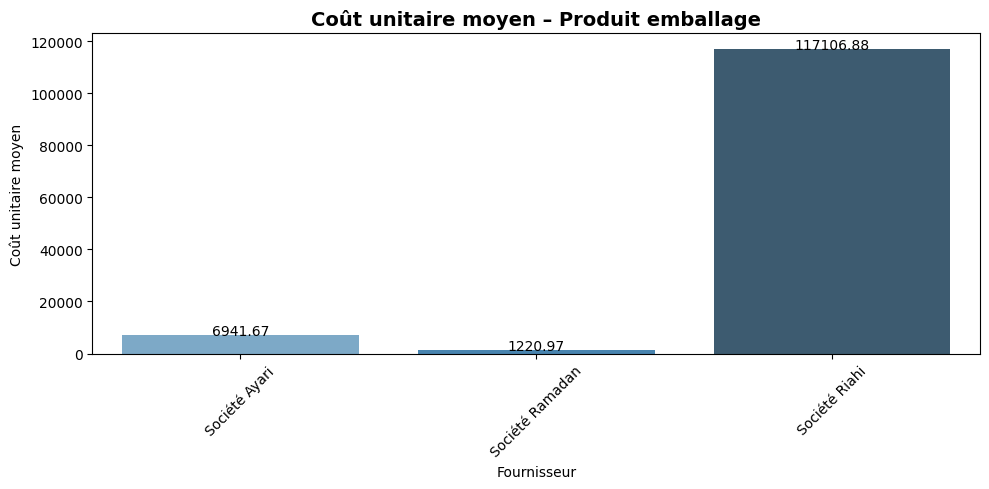

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


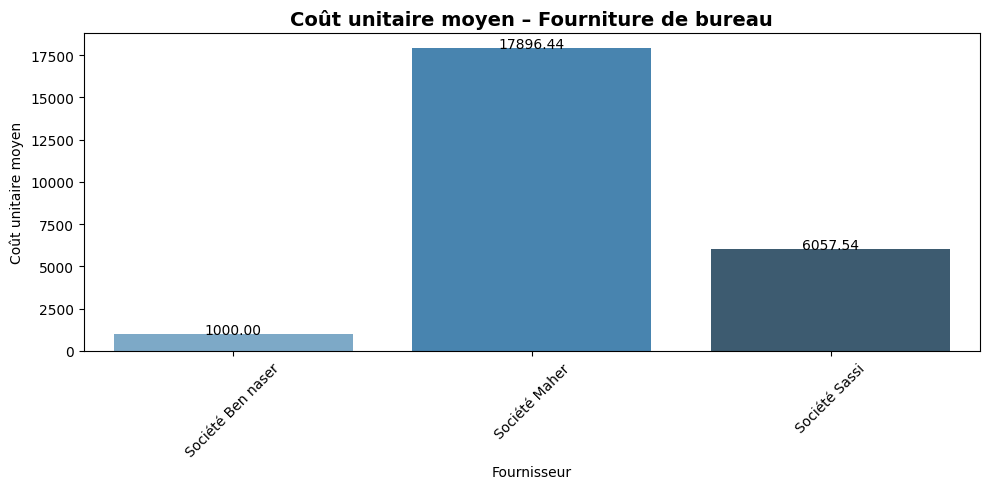

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


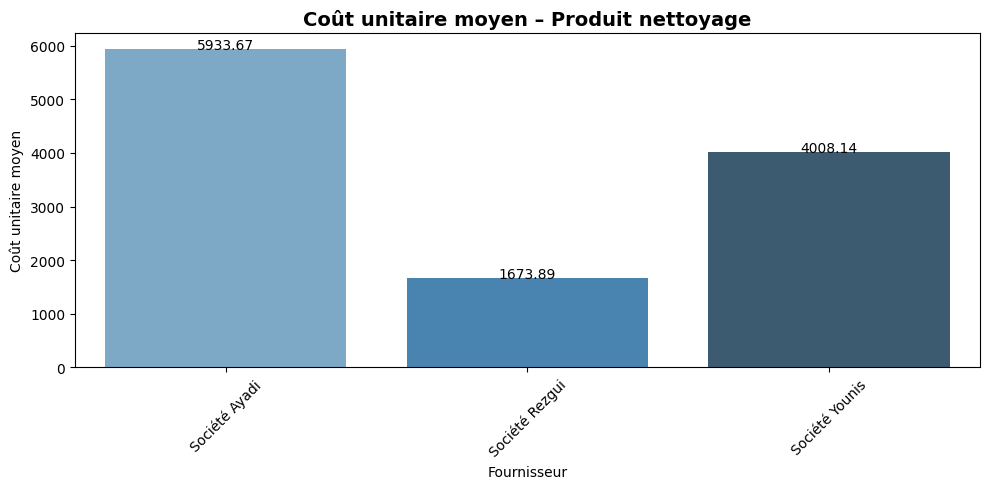

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\4115589011.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


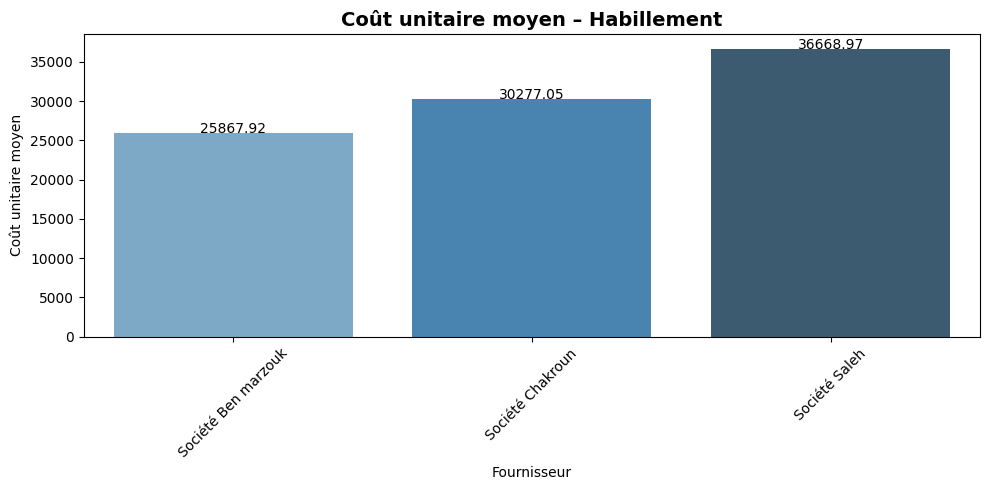

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les donn√©es : uniquement conformes et co√ªt > 0
achats_filtr√© = achats[(achats['conformit√©'] == 1) & (achats['Co√ªt unitaire'] > 0)]

# Trouver les types d'articles uniques
types_articles = achats_filtr√©['Type article'].unique()

# Boucle sur chaque type d'article
for type_article in types_articles:
    # Filtrer les donn√©es pour ce type
    data_type = achats_filtr√©[achats_filtr√©['Type article'] == type_article]
    
    # Trouver les 3 fournisseurs les plus fr√©quents pour ce type
    top_suppliers = data_type['Nom Fournisseur'].value_counts().head(3).index
    
    # Filtrer sur ces top fournisseurs
    data_type = data_type[data_type['Nom Fournisseur'].isin(top_suppliers)]
    
    # Calculer le co√ªt unitaire moyen
    cost_by_supplier = data_type.groupby('Nom Fournisseur')['Co√ªt unitaire'].mean().reset_index()
    
    # Tracer le graphe
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(
        data=cost_by_supplier,
        x='Nom Fournisseur',
        y='Co√ªt unitaire',
        palette='Blues_d'
    )
    
    # Ajouter les valeurs exactes sur les barres
    for i, v in enumerate(cost_by_supplier['Co√ªt unitaire']):
        ax.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10)
    
    # Mise en forme
    plt.title(f"Co√ªt unitaire moyen ‚Äì {type_article}", fontsize=14, fontweight='bold')
    plt.xlabel('Fournisseur')
    plt.ylabel('Co√ªt unitaire moyen')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()





C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\3327084496.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nom Fournisseur', y='Co√ªt unitaire', data=cost_per_unit_by_supplier, palette='viridis')


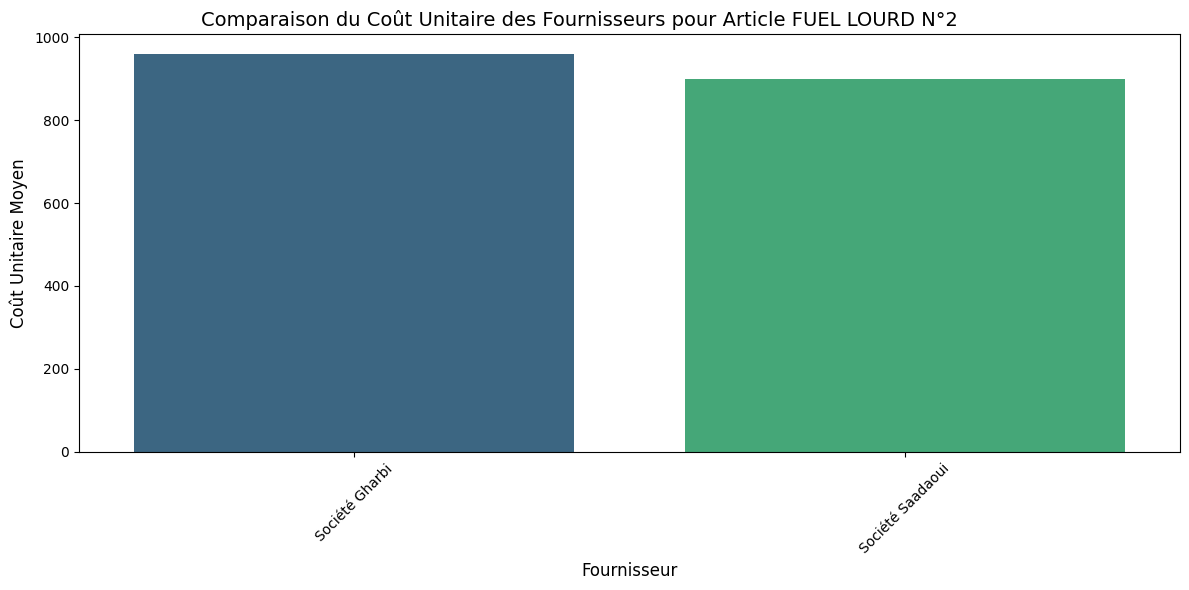

In [45]:
# S√©lectionner un article sp√©cifique (par exemple, l'article le plus fr√©quent)
article_specific = achats['Article '].mode()[0]  # Prend l'article le plus fr√©quent dans les donn√©es

# Filtrer les donn√©es pour cet article sp√©cifique
article_data = achats[achats['Article '] == article_specific]

# Calculer le co√ªt unitaire moyen par fournisseur pour cet article
cost_per_unit_by_supplier = article_data.groupby('Nom Fournisseur')['Co√ªt unitaire'].mean().reset_index()

# Tracer un graphique en barres pour comparer les fournisseurs
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Co√ªt unitaire', data=cost_per_unit_by_supplier, palette='viridis')

# Ajouter un titre et des labels
plt.title(f'Comparaison du Co√ªt Unitaire des Fournisseurs pour Article {article_specific}', fontsize=14)
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Co√ªt Unitaire Moyen', fontsize=12)

# Rotation des labels pour la lisibilit√©
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()







In [46]:
achats.columns

Index(['Soci√©t√©', 'N¬∞commande', 'Type commande', 'Code article', 'Article ',
       'Type article', 'Quantit√©', 'UM', 'Montant', 'Centre de cout',
       'Date commande', 'Date r√©ception', 'dur√©e de livraion',
       'd√©lai de livraison', 'conformit√©', 'Code Fournisseur',
       'Nom Fournisseur', 'adresse', 'quantit√©', 'Co√ªt unitaire',
       'Taux de conformit√© (%)', '√âcart de d√©lai', 'Statut Livraison',
       'Nombre de commandes'],
      dtype='object')

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\1213685957.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nom Fournisseur', y='quantit√©', data=top_suppliers_quantity, palette="Blues_d")


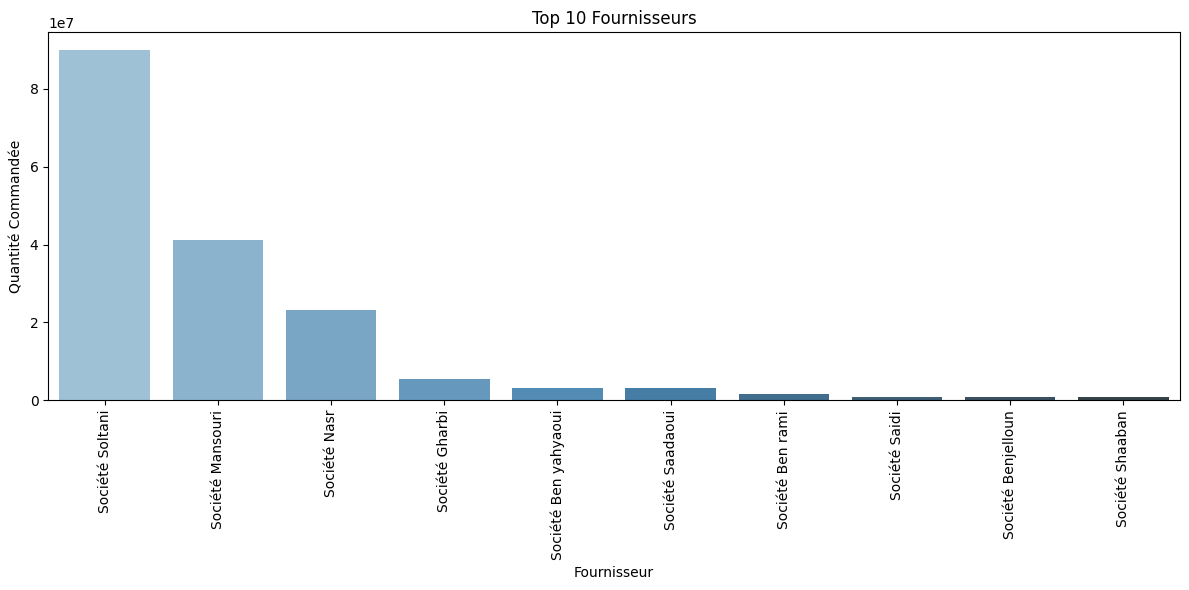

In [47]:
# S√©lectionner les 10 principaux fournisseurs par quantit√©
top_suppliers_quantity = achats.groupby('Nom Fournisseur')['quantit√©'].sum().reset_index()
top_suppliers_quantity = top_suppliers_quantity.sort_values(by='quantit√©', ascending=False).head(10)

# Tracer un diagramme en barres avec Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='quantit√©', data=top_suppliers_quantity, palette="Blues_d")
plt.title('Top 10 Fournisseurs')
plt.xlabel('Fournisseur')
plt.ylabel('Quantit√© Command√©e')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\2809180874.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=commandes_par_type, x="Type article", y="Nombre de commandes", palette="Blues_d")


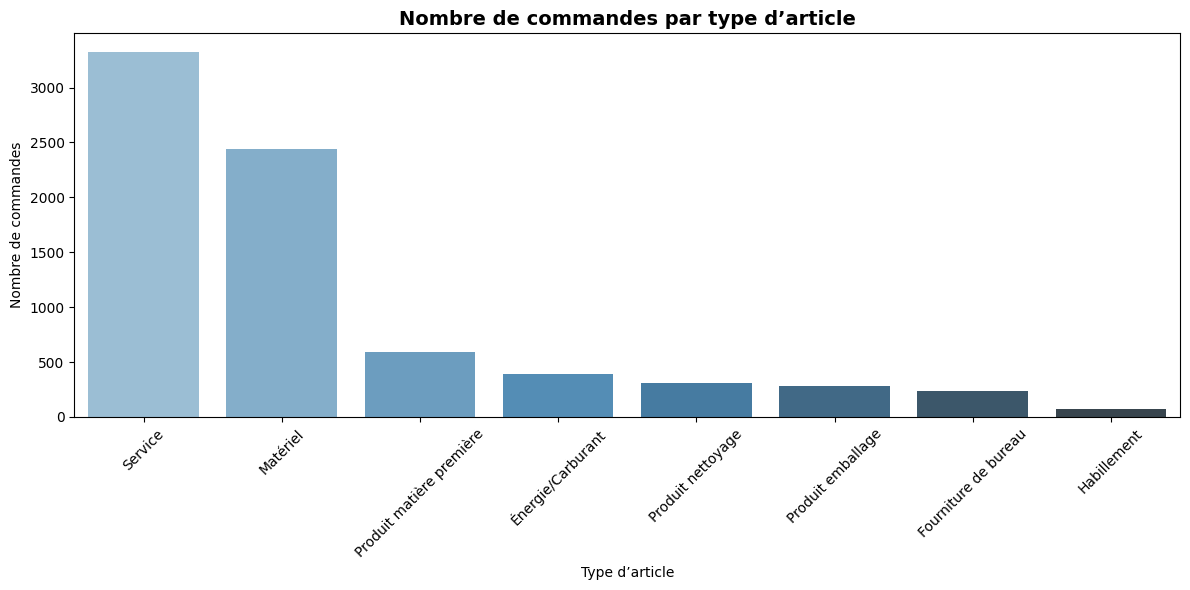

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple de DataFrame (remplace √ßa par ton vrai DataFrame "achats")
# achats = pd.read_csv('ton_fichier.csv')

# Supposons que tu as une colonne "Type article" et une colonne "N¬∞commande" ou √©quivalent
# Groupement pour obtenir le nombre de commandes par type d'article
commandes_par_type = achats.groupby("Type article")["N¬∞commande"].nunique().reset_index()
commandes_par_type.columns = ["Type article", "Nombre de commandes"]

# Tri pour une meilleure lecture
commandes_par_type = commandes_par_type.sort_values(by="Nombre de commandes", ascending=False)

# Cr√©ation du graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=commandes_par_type, x="Type article", y="Nombre de commandes", palette="Blues_d")

# Ajout des √©tiquettes
plt.title("Nombre de commandes par type d‚Äôarticle", fontsize=14, weight='bold')
plt.xlabel("Type d‚Äôarticle")
plt.ylabel("Nombre de commandes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
achats.head()

Soci√©t√©  N¬∞commande Type commande               Code article  \
0        5    22000002            HS  HSDR0007                    
1        5    22000002            OR  P6311047                    
2        5    22000003            AC  M30511105                   
3        5    22000003            HS  HSDLI007                    
4        5    22000003            OR  P9523007                    

                                Article               Type article  Quantit√©  \
0  SRTJ du E2:E13530/11/2021.             Produit mati√®re premi√®re       1.0   
1         FUEL LOURD N¬∞2                         √ânergie/Carburant      30.0   
2          FILM THERMOR√âTRACTABLE NG 40¬µ                   Service   45000.0   
3         reparation palettes                              Service    3402.0   
4         Glasse de niv Type A N¬∞7 A/JTS                  Mat√©riel       2.0   

   UM    Montant Centre de cout  ... conformit√© Code Fournisseur  \
0  UN    3081600        D051008  ...          1          5006997   
1  TN   22276389          PR510  ...          1          5005182   
2  KG  351000000          MP510  ...          1          5006889   
3  UN   10206000       D0510055  ...          1          5007369   
4  PC    2054800          PR510  ...          1          5005182   

   Nom Fournisseur    adresse  quantit√©  Co√ªt unitaire Taux de conformit√© (%)  \
0  Soci√©t√© Mohamed      Gafsa       1.0   3.081600e+06             100.000000   
1   Soci√©t√© Gharbi     Nabeul   30000.0   7.425463e+02              72.143532   
2  Soci√©t√© Hammami  Tataouine   45000.0   7.800000e+03             100.000000   
3    Soci√©t√© Allah   Jendouba    3402.0   3.000000e+03             100.000000   
4   Soci√©t√© Gharbi      Gab√®s       2.0   1.027400e+06              72.143532   

  √âcart de d√©lai  Statut Livraison  Nombre de commandes  
0            -16          Respect√©                   17  
1              8            Retard                 8472  
2             21            Retard                   20  
3              9            Retard                   43  
4             -2          Respect√©                 8472  

[5 rows x 24 columns]

In [50]:
# Convertir 'Statut Livraison' en valeur num√©rique
achats['Respect_d√©lais'] = (achats['Statut Livraison'] == 'Respect√©').astype(int)

# V√©rification rapide
print(achats[['Statut Livraison', 'Respect_d√©lais']].head())

  Statut Livraison  Respect_d√©lais
0         Respect√©               1
1           Retard               0
2           Retard               0
3           Retard               0
4         Respect√©               1


In [51]:
 # Calcul du Taux de Respect des D√©lais par fournisseur
taux_respect = achats.groupby('Nom Fournisseur').apply(
    lambda x: (x['Statut Livraison'] == 'Respect√©').mean() * 100
).reset_index(name='Taux de Respect (%)')

# Fusionner avec le DataFrame principal 
achats = achats.merge(taux_respect, on='Nom Fournisseur', how='left')

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\1915269878.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  taux_respect = achats.groupby('Nom Fournisseur').apply(


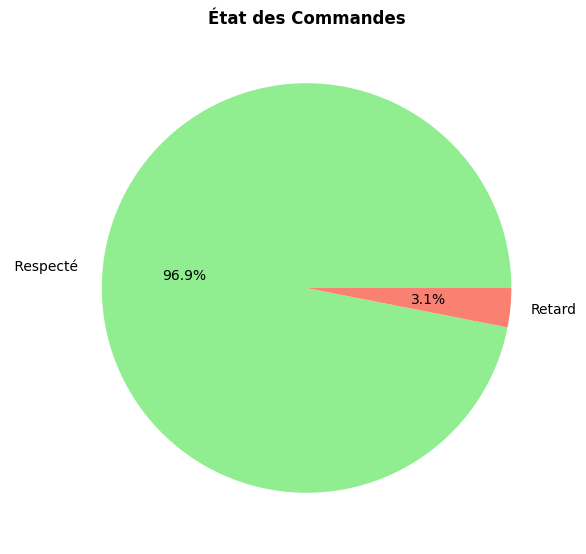

In [52]:
# Calculer le nombre de commandes conformes et non conformes
conforme_count = achats['Respect_d√©lais'].value_counts()

# Tracer un diagramme circulaire
plt.figure(figsize=(6, 6))
plt.pie(conforme_count, labels=[' Respect√© ', 'Retard'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('√âtat des Commandes', weight='bold')
plt.tight_layout()
plt.show()

In [53]:
achats

Soci√©t√©  N¬∞commande Type commande               Code article  \
0            5    22000002            HS  HSDR0007                    
1            5    22000002            OR  P6311047                    
2            5    22000003            AC  M30511105                   
3            5    22000003            HS  HSDLI007                    
4            5    22000003            OR  P9523007                    
...        ...         ...           ...                        ...   
23078        5    24900731            OR  HSCLN0015                   
23079        5    24900731            OR  HSCLN0015                   
23080        5    24900732            OR  HSCLN0014                   
23081        5    24900733            OR  HSCLN0032                   
23082        5   922000015            OR  P5611013                    

                                    Article               Type article  \
0      SRTJ du E2:E13530/11/2021.             Produit mati√®re premi√®re   
1             FUEL LOURD N¬∞2                         √ânergie/Carburant   
2              FILM THERMOR√âTRACTABLE NG 40¬µ                   Service   
3             reparation palettes                              Service   
4             Glasse de niv Type A N¬∞7 A/JTS                  Mat√©riel   
...                                      ...                       ...   
23078         frais de participation                           Service   
23079         hebergement                                      Service   
23080         Abonnement salle de sport                        Service   
23081         disque dur externe SSD 512 go                   Mat√©riel   
23082         COLLIER DE SERRAGE 8/14                         Mat√©riel   

       Quantit√©  UM    Montant Centre de cout  ...      Nom Fournisseur  \
0           1.0  UN    3081600        D051008  ...      Soci√©t√© Mohamed   
1          30.0  TN   22276389          PR510  ...       Soci√©t√© Gharbi   
2       45000.0  KG  351000000          MP510  ...      Soci√©t√© Hammami   
3        3402.0  UN   10206000       D0510055  ...        Soci√©t√© Allah   
4           2.0  PC    2054800          PR510  ...       Soci√©t√© Gharbi   
...         ...  ..        ...            ...  ...                  ...   
23078       2.0  PI    1344538        D051008  ...  Soci√©t√© Ben Mabrouk   
23079       2.0  PI     280374        D051008  ...  Soci√©t√© Ben Mabrouk   
23080       1.0  PI     873000        D051008  ...  Soci√©t√© Ben Mabrouk   
23081       1.0  PI       1000        D051007  ...    Soci√©t√© Ben naser   
23082      30.0  PI      19980          PR510  ...       Soci√©t√© Gharbi   

           adresse  quantit√©  Co√ªt unitaire  Taux de conformit√© (%)  \
0            Gafsa       1.0   3.081600e+06              100.000000   
1           Nabeul   30000.0   7.425463e+02               72.143532   
2        Tataouine   45000.0   7.800000e+03              100.000000   
3         Jendouba    3402.0   3.000000e+03              100.000000   
4            Gab√®s       2.0   1.027400e+06               72.143532   
...            ...       ...            ...                     ...   
23078  Sidi Bouzid       2.0   6.722690e+05              100.000000   
23079    Kasserine       2.0   1.401870e+05              100.000000   
23080      Bizerte       1.0   8.730000e+05              100.000000   
23081    Kasserine       1.0   1.000000e+03              100.000000   
23082        Tunis      30.0   6.660000e+02               72.143532   

       √âcart de d√©lai Statut Livraison Nombre de commandes  Respect_d√©lais  \
0                 -16         Respect√©                  17               1   
1                   8           Retard                8472               0   
2                  21           Retard                  20               0   
3                   9           Retard                  43               0   
4                  -2         Respect√©                8472               1   


In [54]:
achats.columns

Index(['Soci√©t√©', 'N¬∞commande', 'Type commande', 'Code article', 'Article ',
       'Type article', 'Quantit√©', 'UM', 'Montant', 'Centre de cout',
       'Date commande', 'Date r√©ception', 'dur√©e de livraion',
       'd√©lai de livraison', 'conformit√©', 'Code Fournisseur',
       'Nom Fournisseur', 'adresse', 'quantit√©', 'Co√ªt unitaire',
       'Taux de conformit√© (%)', '√âcart de d√©lai', 'Statut Livraison',
       'Nombre de commandes', 'Respect_d√©lais', 'Taux de Respect (%)'],
      dtype='object')

C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\1397843888.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de Respect (%)'].apply(


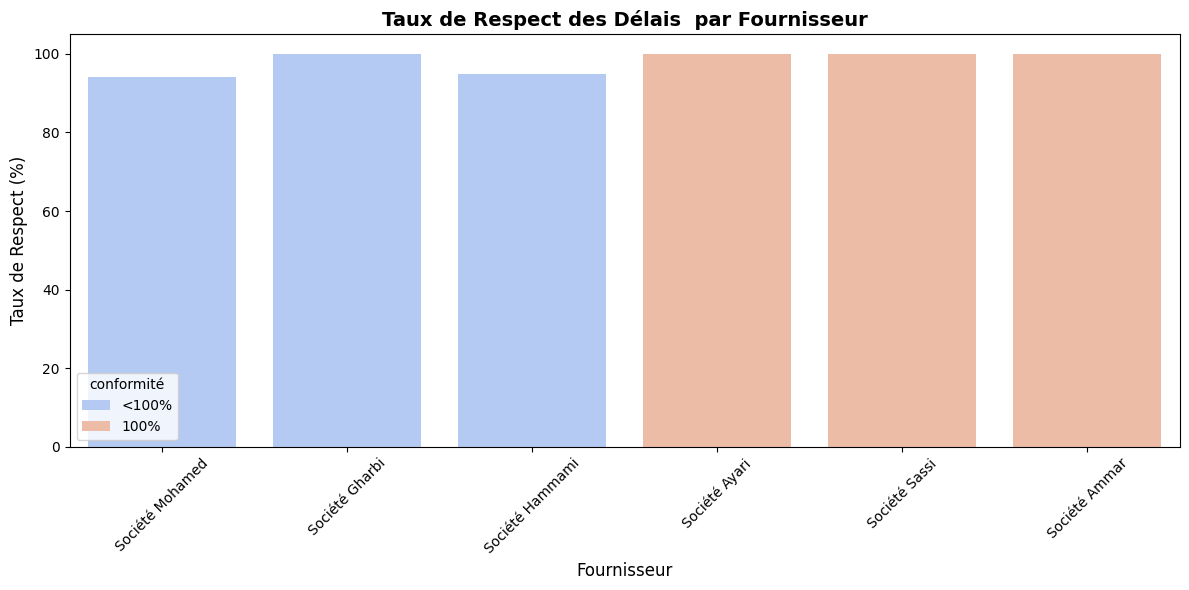

In [55]:
# Filtrer les fournisseurs et articles avec taux de conformit√© 100% ou inf√©rieur
conformite_100 = achats[achats['Taux de Respect (%)'] == 100]
conformite_inferieur = achats[achats['Taux de Respect (%)'] < 100]

# S√©lectionner un sous-ensemble (ex : 3 fournisseurs avec conformit√© 100% et 3 avec inf√©rieur)
fournisseurs_100 = conformite_100['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux 100%
fournisseurs_inferieur = conformite_inferieur['Nom Fournisseur'].unique()[:3]  # 3 fournisseurs avec taux < 100%

# Cr√©er un sous-ensemble avec ces fournisseurs
fournisseurs_selectionnes = np.concatenate([fournisseurs_100, fournisseurs_inferieur])

# Filtrer les donn√©es pour ne garder que ces fournisseurs
achats_filtr√©s = achats[achats['Nom Fournisseur'].isin(fournisseurs_selectionnes)]

# Cr√©er une nouvelle colonne pour d√©finir les cat√©gories 100% ou <100%
achats_filtr√©s['conformit√©'] = achats_filtr√©s['Taux de Respect (%)'].apply(
    lambda x: '100%' if x == 100 else '<100%'
)

# Tracer le graphique √† barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Nom Fournisseur', y='Taux de Respect (%)', hue='conformit√©', data=achats_filtr√©s, palette='coolwarm')

# Ajouter un titre et des labels
plt.title('Taux de Respect des D√©lais  par Fournisseur', fontsize=14, weight='bold')
plt.xlabel('Fournisseur', fontsize=12)
plt.ylabel('Taux de Respect (%)', fontsize=12)

# Rotation des labels pour la lisibilit√©
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [56]:
achats.columns

Index(['Soci√©t√©', 'N¬∞commande', 'Type commande', 'Code article', 'Article ',
       'Type article', 'Quantit√©', 'UM', 'Montant', 'Centre de cout',
       'Date commande', 'Date r√©ception', 'dur√©e de livraion',
       'd√©lai de livraison', 'conformit√©', 'Code Fournisseur',
       'Nom Fournisseur', 'adresse', 'quantit√©', 'Co√ªt unitaire',
       'Taux de conformit√© (%)', '√âcart de d√©lai', 'Statut Livraison',
       'Nombre de commandes', 'Respect_d√©lais', 'Taux de Respect (%)'],
      dtype='object')

In [57]:
# Liste des colonnes √† supprimer
colonnes_a_supprimer = ['Montant', 'd√©lai de livraison',  'Statut Livraison','√âcart de d√©lai', 'Soci√©t√©','Centre de cout','Type commande','dur√©e de livraion']

# Suppression des colonnes
achats = achats.drop(columns=colonnes_a_supprimer)

In [58]:
achats

N¬∞commande               Code article  \
0        22000002  HSDR0007                    
1        22000002  P6311047                    
2        22000003  M30511105                   
3        22000003  HSDLI007                    
4        22000003  P9523007                    
...           ...                        ...   
23078    24900731  HSCLN0015                   
23079    24900731  HSCLN0015                   
23080    24900732  HSCLN0014                   
23081    24900733  HSCLN0032                   
23082   922000015  P5611013                    

                                    Article               Type article  \
0      SRTJ du E2:E13530/11/2021.             Produit mati√®re premi√®re   
1             FUEL LOURD N¬∞2                         √ânergie/Carburant   
2              FILM THERMOR√âTRACTABLE NG 40¬µ                   Service   
3             reparation palettes                              Service   
4             Glasse de niv Type A N¬∞7 A/JTS                  Mat√©riel   
...                                      ...                       ...   
23078         frais de participation                           Service   
23079         hebergement                                      Service   
23080         Abonnement salle de sport                        Service   
23081         disque dur externe SSD 512 go                   Mat√©riel   
23082         COLLIER DE SERRAGE 8/14                         Mat√©riel   

       Quantit√©  UM Date commande Date r√©ception  conformit√©  \
0           1.0  UN    2022-01-03     2022-01-12           1   
1          30.0  TN    2022-01-04     2022-01-20           1   
2       45000.0  KG    2022-01-05     2022-01-30           1   
3        3402.0  UN    2022-01-03     2022-01-15           1   
4           2.0  PC    2022-01-04     2022-01-10           1   
...         ...  ..           ...            ...         ...   
23078       2.0  PI    2024-10-24     2024-10-31           1   
23079       2.0  PI    2024-10-24     2024-10-31           1   
23080       1.0  PI    2024-10-24     2024-10-31           1   
23081       1.0  PI    2024-10-24     2024-10-31           1   
23082      30.0  PI    2022-01-05     2022-01-08           1   

       Code Fournisseur      Nom Fournisseur      adresse  quantit√©  \
0               5006997      Soci√©t√© Mohamed        Gafsa       1.0   
1               5005182       Soci√©t√© Gharbi       Nabeul   30000.0   
2               5006889      Soci√©t√© Hammami    Tataouine   45000.0   
3               5007369        Soci√©t√© Allah     Jendouba    3402.0   
4               5005182       Soci√©t√© Gharbi        Gab√®s       2.0   
...                 ...                  ...          ...       ...   
23078            559911  Soci√©t√© Ben Mabrouk  Sidi Bouzid       2.0   
23079            559911  Soci√©t√© Ben Mabrouk    Kasserine       2.0   
23080            559911  Soci√©t√© Ben Mabrouk      Bizerte       1.0   
23081            550645    Soci√©t√© Ben naser    Kasserine       1.0   
23082           5005182       Soci√©t√© Gharbi        Tunis      30.0   

       Co√ªt unitaire  Taux de conformit√© (%)  Nombre de commandes  \
0       3.081600e+06              100.000000                   17   
1       7.425463e+02               72.143532                 8472   
2       7.800000e+03              100.000000                   20   
3       3.000000e+03              100.000000                   43   
4       1.027400e+06               72.143532                 8472   
...              ...                     ...                  ...   
23078   6.722690e+05              100.000000                  215   
23079   1.401870e+05              100.000000                  215   
23080   8.730000e+05              100.000000                  215   
23081   1.000000e+03              100.000000                  192   
23082   6.660000e+02               72.143532                 8472   

       Respect_d√©lais  Taux de Respect (%)  
0     

In [59]:
# D√©finition des pond√©rations
w1, w2, w3, w4 = 0.4, 0.3, 0.2, 0.1  

In [60]:
# Normalisation du co√ªt unitaire 
achats["Co√ªt unitaire normalis√©"] = 1 / (achats["Co√ªt unitaire"] + 1)  # Ajout de +1 pour √©viter l'infini
achats["Nombre commandes normalis√©"] = achats["Nombre de commandes"] / achats["Nombre de commandes"].max()

In [61]:
# Calcul du score (normalis√© entre 0 et 10)
achats["Score"] = 10 * (
    w1 * achats["Taux de conformit√© (%)"] / 100 +
    w2 * achats["Taux de Respect (%)"] / 100 +
    w3 * achats["Co√ªt unitaire normalis√©"] +
    w4 * achats["Nombre commandes normalis√©"]
)

In [62]:
# Fonction de cat√©gorisation
def categoriser(score):
    if score >= 8:
        return "Tr√®s Fiable"
    elif 5 <= score < 8:
        return "Moyen"
    else:
        return "Risqu√©"

# Appliquer la cat√©gorisation
achats["Cat√©gorie"] = achats["Score"].apply(categoriser)

# Afficher les r√©sultats
achats[["Nom Fournisseur", "Score", "Cat√©gorie"]].head(9)

Nom Fournisseur     Score    Cat√©gorie
0  Soci√©t√© Mohamed  6.825537        Moyen
1   Soci√©t√© Gharbi  6.886661        Moyen
2  Soci√©t√© Hammami  6.852617        Moyen
3    Soci√©t√© Allah  6.935975        Moyen
4   Soci√©t√© Gharbi  6.883973        Moyen
5      Soci√©t√© Ali  6.401500        Moyen
6    Soci√©t√© Dridi  5.500241        Moyen
7   Soci√©t√© Cherif  8.254465  Tr√®s Fiable
8    Soci√©t√© Ayari  7.001739        Moyen

In [63]:

# Afficher uniquement les fournisseurs "Risqu√©"
print(achats[achats["Cat√©gorie"] == "Risqu√©"][["Nom Fournisseur", "Score","Cat√©gorie"]])

            Nom Fournisseur     Score Cat√©gorie
161           Soci√©t√© Saeed  4.322519    Risqu√©
1207          Soci√©t√© Saeed  4.322519    Risqu√©
1311          Soci√©t√© Saeed  4.322518    Risqu√©
1563           Soci√©t√© Amin  4.274074    Risqu√©
1564           Soci√©t√© Amin  4.274064    Risqu√©
...                     ...       ...       ...
20801  Soci√©t√© Ben boubaker  4.000119    Risqu√©
20929  Soci√©t√© Ben Mansouri  4.000119    Risqu√©
20952   Soci√©t√© Ben mansour  4.000118    Risqu√©
21573     Soci√©t√© Ben saber  4.000121    Risqu√©
21575         Soci√©t√© Saeed  4.322540    Risqu√©

[108 rows x 3 columns]


In [64]:
achats

N¬∞commande               Code article  \
0        22000002  HSDR0007                    
1        22000002  P6311047                    
2        22000003  M30511105                   
3        22000003  HSDLI007                    
4        22000003  P9523007                    
...           ...                        ...   
23078    24900731  HSCLN0015                   
23079    24900731  HSCLN0015                   
23080    24900732  HSCLN0014                   
23081    24900733  HSCLN0032                   
23082   922000015  P5611013                    

                                    Article               Type article  \
0      SRTJ du E2:E13530/11/2021.             Produit mati√®re premi√®re   
1             FUEL LOURD N¬∞2                         √ânergie/Carburant   
2              FILM THERMOR√âTRACTABLE NG 40¬µ                   Service   
3             reparation palettes                              Service   
4             Glasse de niv Type A N¬∞7 A/JTS                  Mat√©riel   
...                                      ...                       ...   
23078         frais de participation                           Service   
23079         hebergement                                      Service   
23080         Abonnement salle de sport                        Service   
23081         disque dur externe SSD 512 go                   Mat√©riel   
23082         COLLIER DE SERRAGE 8/14                         Mat√©riel   

       Quantit√©  UM Date commande Date r√©ception  conformit√©  \
0           1.0  UN    2022-01-03     2022-01-12           1   
1          30.0  TN    2022-01-04     2022-01-20           1   
2       45000.0  KG    2022-01-05     2022-01-30           1   
3        3402.0  UN    2022-01-03     2022-01-15           1   
4           2.0  PC    2022-01-04     2022-01-10           1   
...         ...  ..           ...            ...         ...   
23078       2.0  PI    2024-10-24     2024-10-31           1   
23079       2.0  PI    2024-10-24     2024-10-31           1   
23080       1.0  PI    2024-10-24     2024-10-31           1   
23081       1.0  PI    2024-10-24     2024-10-31           1   
23082      30.0  PI    2022-01-05     2022-01-08           1   

       Code Fournisseur  ... quantit√© Co√ªt unitaire  Taux de conformit√© (%)  \
0               5006997  ...      1.0  3.081600e+06              100.000000   
1               5005182  ...  30000.0  7.425463e+02               72.143532   
2               5006889  ...  45000.0  7.800000e+03              100.000000   
3               5007369  ...   3402.0  3.000000e+03              100.000000   
4               5005182  ...      2.0  1.027400e+06               72.143532   
...                 ...  ...      ...           ...                     ...   
23078            559911  ...      2.0  6.722690e+05              100.000000   
23079            559911  ...      2.0  1.401870e+05              100.000000   
23080            559911  ...      1.0  8.730000e+05              100.000000   
23081            550645  ...      1.0  1.000000e+03              100.000000   
23082           5005182  ...     30.0  6.660000e+02               72.143532   

       Nombre de commandes  Respect_d√©lais  Taux de Respect (%)  \
0                       17               1            94.117647   
1                     8472               0            99.940982   
2                       20               0            95.000000   
3                       43               0            97.674419   
4                     8472               1            99.940982   
...                    ...             ...                  ...   
23078                  215               1           100.000000   
23079                  215               1           100.000000   
23080                  215               1           100.000000   
23081                  192               1            97.916667   
23082                 8472               1            99.940982   



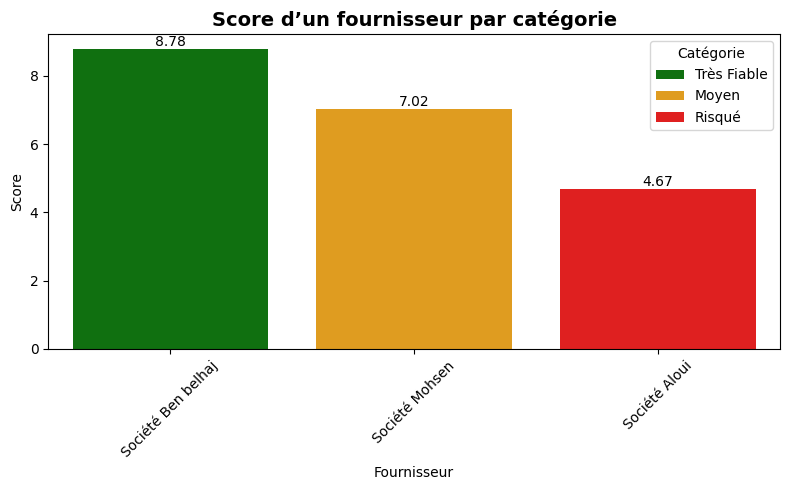

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# S√©lectionner 1 fournisseur par cat√©gorie (sans doublons)
f1 = achats[achats['Cat√©gorie'] == 'Tr√®s Fiable'].drop_duplicates('Nom Fournisseur').sample(n=1, random_state=1)
f2 = achats[achats['Cat√©gorie'] == 'Moyen'].drop_duplicates('Nom Fournisseur').sample(n=1, random_state=1)
f3 = achats[achats['Cat√©gorie'] == 'Risqu√©'].drop_duplicates('Nom Fournisseur').sample(n=1, random_state=1)

# Combiner les 3 fournisseurs
fournisseurs_selectionnes = pd.concat([f1, f2, f3])

# Graphique
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=fournisseurs_selectionnes, 
    x='Nom Fournisseur', 
    y='Score', 
    hue='Cat√©gorie', 
    palette={'Tr√®s Fiable': 'green', 'Moyen': 'orange', 'Risqu√©': 'red'}
)

# Ajouter les scores sur les barres
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10
        )

# Mise en forme
plt.title("Score d‚Äôun fournisseur par cat√©gorie", fontsize=14, weight='bold')
plt.xlabel("Fournisseur")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Cat√©gorie")
plt.tight_layout()
plt.show()


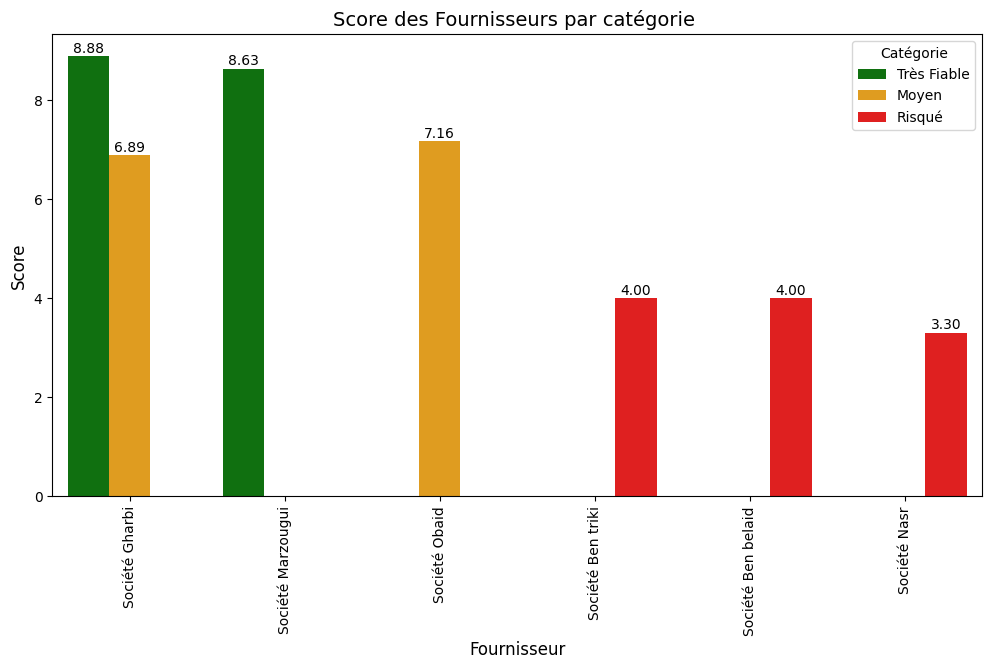

In [66]:
# S√©lectionner un sous-ensemble de 3 fournisseurs par cat√©gorie
fournisseurs_tres_fiable = achats[achats['Cat√©gorie'] == 'Tr√®s Fiable'].sample(n=3, random_state=1)
fournisseurs_moyen = achats[achats['Cat√©gorie'] == 'Moyen'].sample(n=3, random_state=1)
fournisseurs_risque = achats[achats['Cat√©gorie'] == 'Risqu√©'].sample(n=3, random_state=1)

# Combiner les sous-ensembles
fournisseurs_selectionnes = pd.concat([fournisseurs_tres_fiable, fournisseurs_moyen, fournisseurs_risque])

# Graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=fournisseurs_selectionnes, 
            x='Nom Fournisseur', 
            y='Score', 
            hue='Cat√©gorie', 
            palette=['green', 'orange', 'red'])  # Utilisation d'une palette pour les 3 cat√©gories

# Ajouter un titre et des labels
plt.title("Score des Fournisseurs par cat√©gorie ", fontsize=14)
plt.xlabel("Fournisseur", fontsize=12)
plt.ylabel("Score", fontsize=12)

# Rotation des √©tiquettes de l'axe x
plt.xticks(rotation=90)

# Affichage de la l√©gende
plt.legend(title="Cat√©gorie")

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 0.01,
                 f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Afficher le graphique
plt.show()


In [67]:
achats

N¬∞commande               Code article  \
0        22000002  HSDR0007                    
1        22000002  P6311047                    
2        22000003  M30511105                   
3        22000003  HSDLI007                    
4        22000003  P9523007                    
...           ...                        ...   
23078    24900731  HSCLN0015                   
23079    24900731  HSCLN0015                   
23080    24900732  HSCLN0014                   
23081    24900733  HSCLN0032                   
23082   922000015  P5611013                    

                                    Article               Type article  \
0      SRTJ du E2:E13530/11/2021.             Produit mati√®re premi√®re   
1             FUEL LOURD N¬∞2                         √ânergie/Carburant   
2              FILM THERMOR√âTRACTABLE NG 40¬µ                   Service   
3             reparation palettes                              Service   
4             Glasse de niv Type A N¬∞7 A/JTS                  Mat√©riel   
...                                      ...                       ...   
23078         frais de participation                           Service   
23079         hebergement                                      Service   
23080         Abonnement salle de sport                        Service   
23081         disque dur externe SSD 512 go                   Mat√©riel   
23082         COLLIER DE SERRAGE 8/14                         Mat√©riel   

       Quantit√©  UM Date commande Date r√©ception  conformit√©  \
0           1.0  UN    2022-01-03     2022-01-12           1   
1          30.0  TN    2022-01-04     2022-01-20           1   
2       45000.0  KG    2022-01-05     2022-01-30           1   
3        3402.0  UN    2022-01-03     2022-01-15           1   
4           2.0  PC    2022-01-04     2022-01-10           1   
...         ...  ..           ...            ...         ...   
23078       2.0  PI    2024-10-24     2024-10-31           1   
23079       2.0  PI    2024-10-24     2024-10-31           1   
23080       1.0  PI    2024-10-24     2024-10-31           1   
23081       1.0  PI    2024-10-24     2024-10-31           1   
23082      30.0  PI    2022-01-05     2022-01-08           1   

       Code Fournisseur  ... quantit√© Co√ªt unitaire  Taux de conformit√© (%)  \
0               5006997  ...      1.0  3.081600e+06              100.000000   
1               5005182  ...  30000.0  7.425463e+02               72.143532   
2               5006889  ...  45000.0  7.800000e+03              100.000000   
3               5007369  ...   3402.0  3.000000e+03              100.000000   
4               5005182  ...      2.0  1.027400e+06               72.143532   
...                 ...  ...      ...           ...                     ...   
23078            559911  ...      2.0  6.722690e+05              100.000000   
23079            559911  ...      2.0  1.401870e+05              100.000000   
23080            559911  ...      1.0  8.730000e+05              100.000000   
23081            550645  ...      1.0  1.000000e+03              100.000000   
23082           5005182  ...     30.0  6.660000e+02               72.143532   

       Nombre de commandes  Respect_d√©lais  Taux de Respect (%)  \
0                       17               1            94.117647   
1                     8472               0            99.940982   
2                       20               0            95.000000   
3                       43               0            97.674419   
4                     8472               1            99.940982   
...                    ...             ...                  ...   
23078                  215               1           100.000000   
23079                  215               1           100.000000   
23080                  215               1           100.000000   
23081                  192               1            97.916667   
23082                 8472               1            99.940982   



In [68]:
# Par type d'article, estimer le nombre de jours moyens entre 2 commandes
df_sorted = achats.sort_values(['Type article', 'Date commande'])

df_sorted['prev_date'] = df_sorted.groupby('Type article')['Date commande'].shift(1)
df_sorted['diff_days'] = (df_sorted['Date commande'] - df_sorted['prev_date']).dt.days

# Moyenne d'intervalle par type d'article
horizons = df_sorted.groupby('Type article')['diff_days'].mean().dropna()

# Exemple r√©sultat
print(horizons)
# Produit emballage: 30 ‚Üí horizon = 6 mois
# Service: 15 ‚Üí horizon = 3 mois
# √ânergie/Carburant: 90 ‚Üí horizon = 12 mois


Type article
Fourniture de bureau        2.273305
Habillement                 3.429487
Mat√©riel                    0.074880
Produit emballage           2.590909
Produit mati√®re premi√®re    1.101420
Produit nettoyage           2.387665
Service                     0.209758
√ânergie/Carburant           1.771475
Name: diff_days, dtype: float64


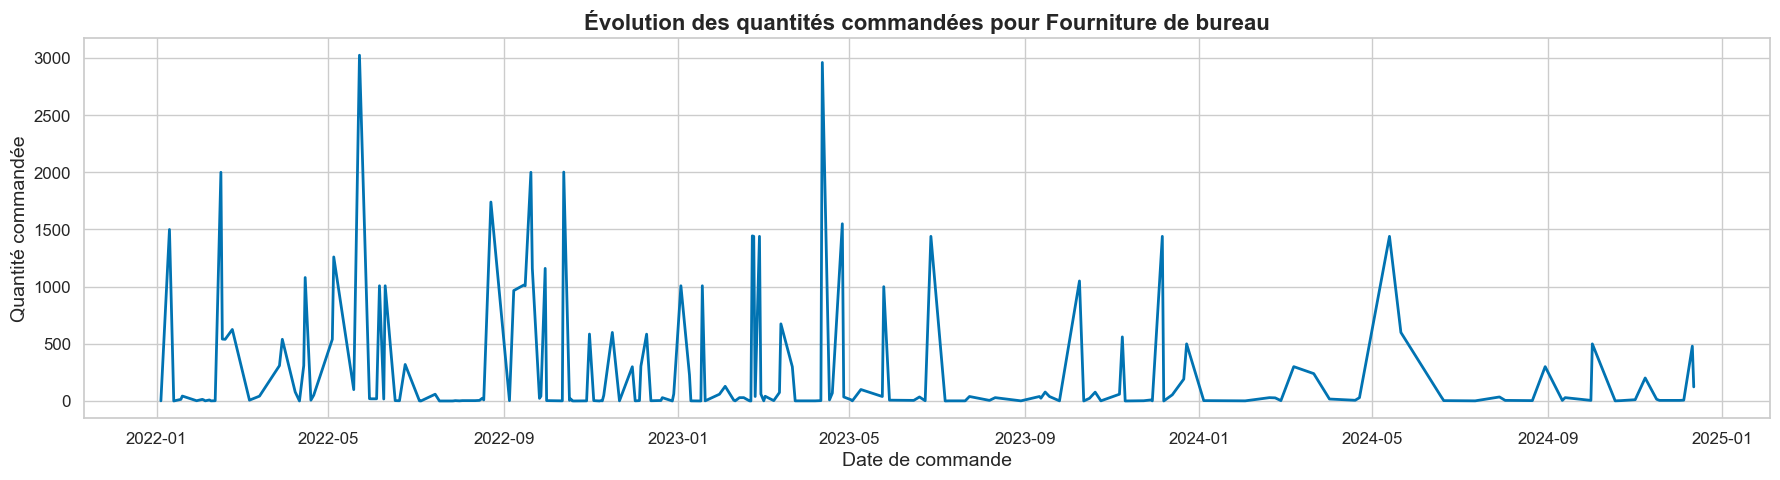

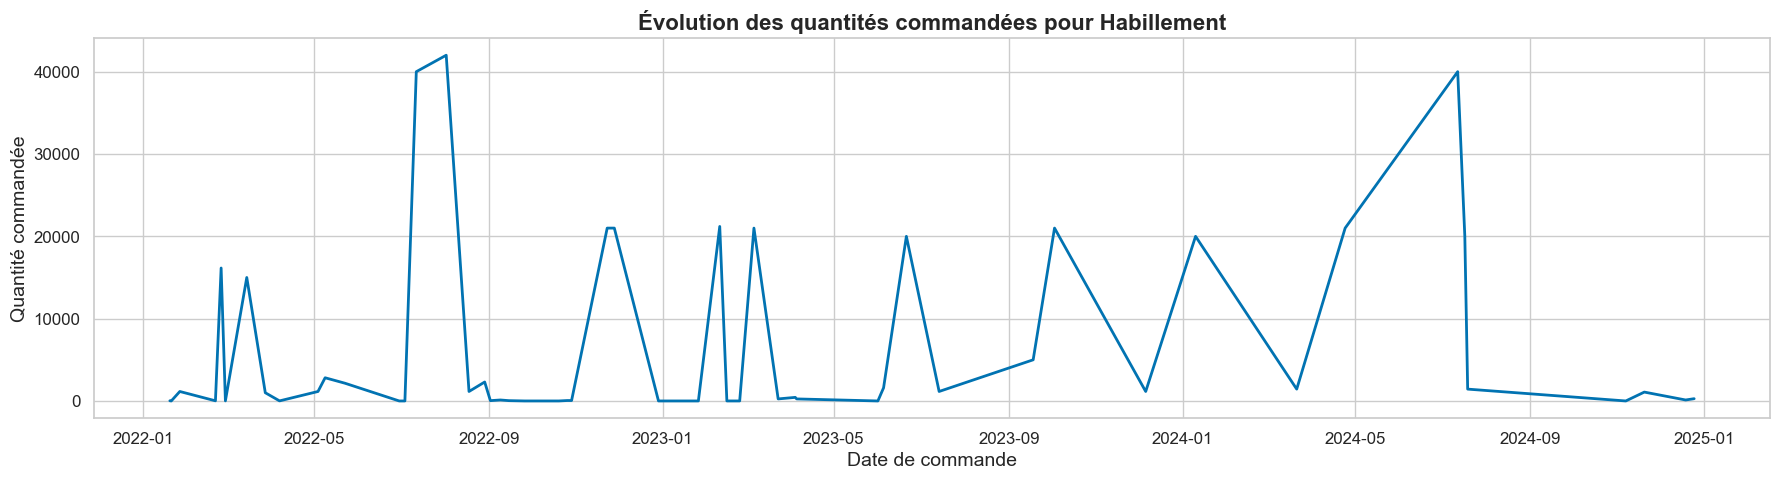

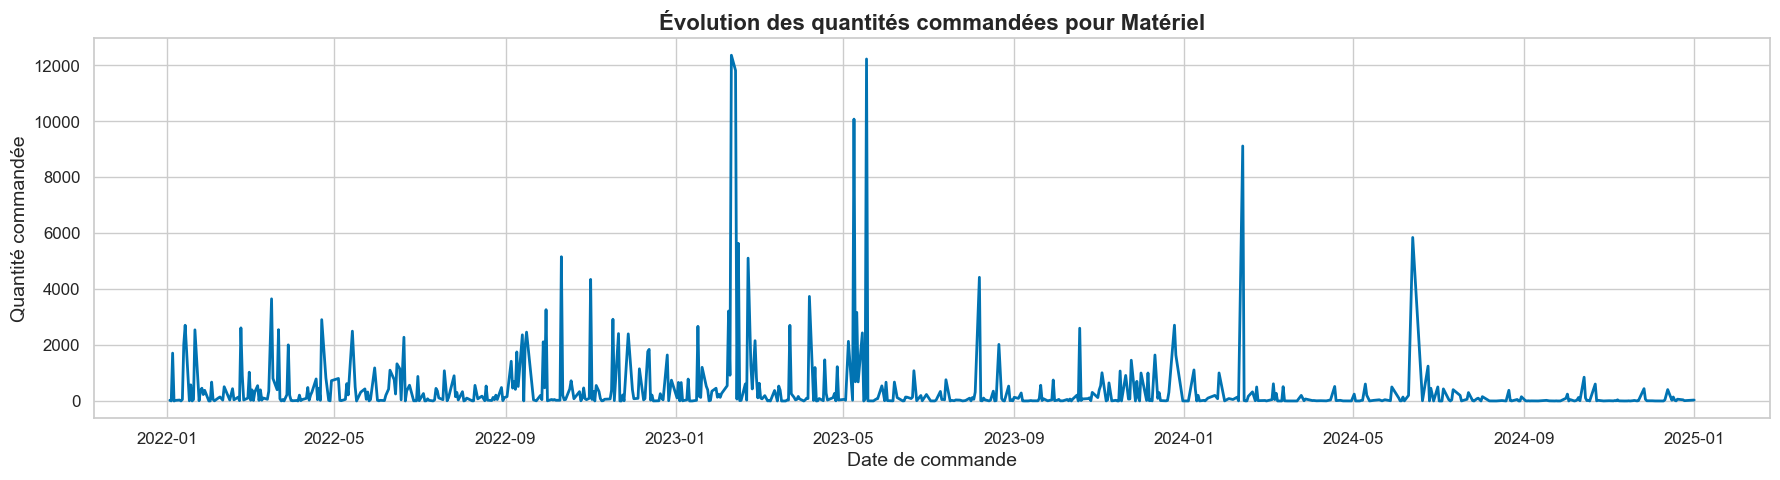

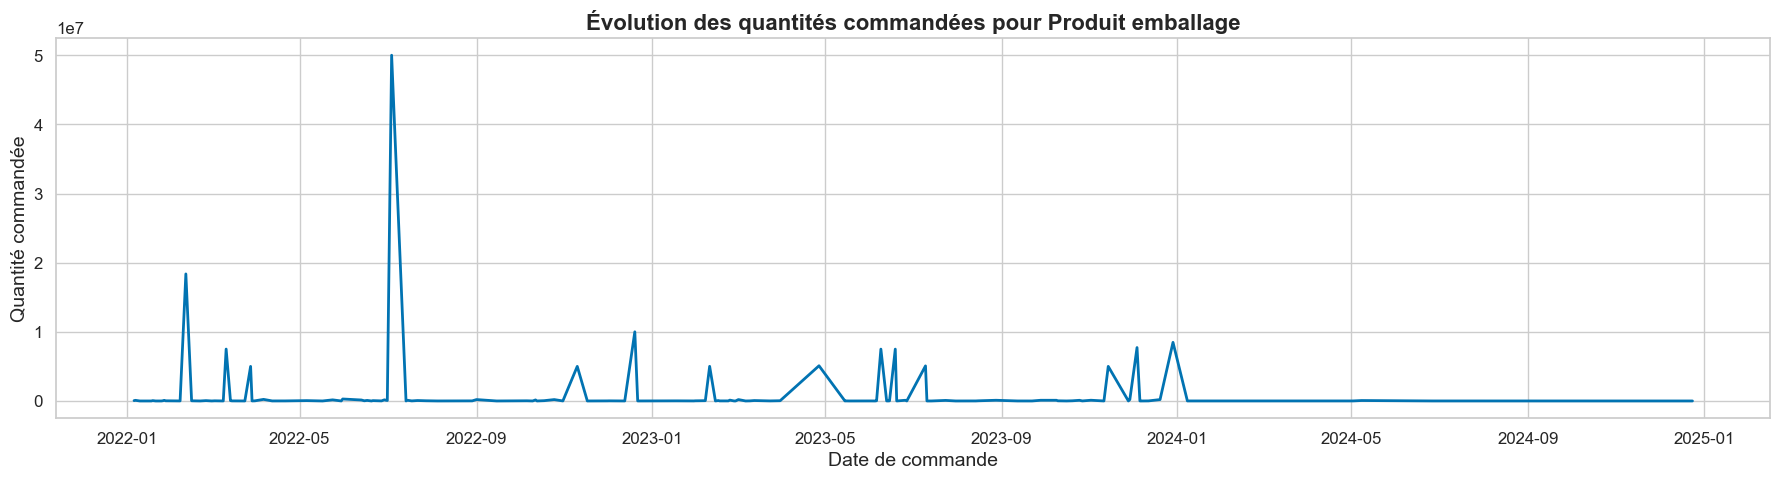

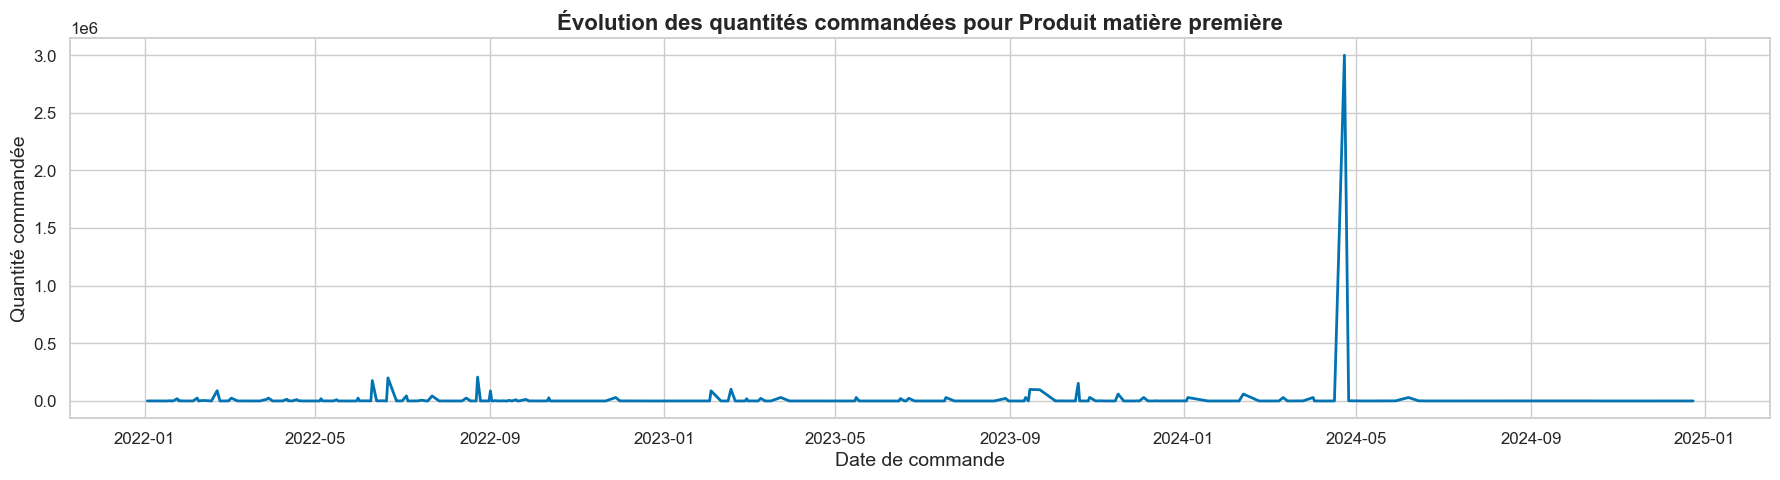

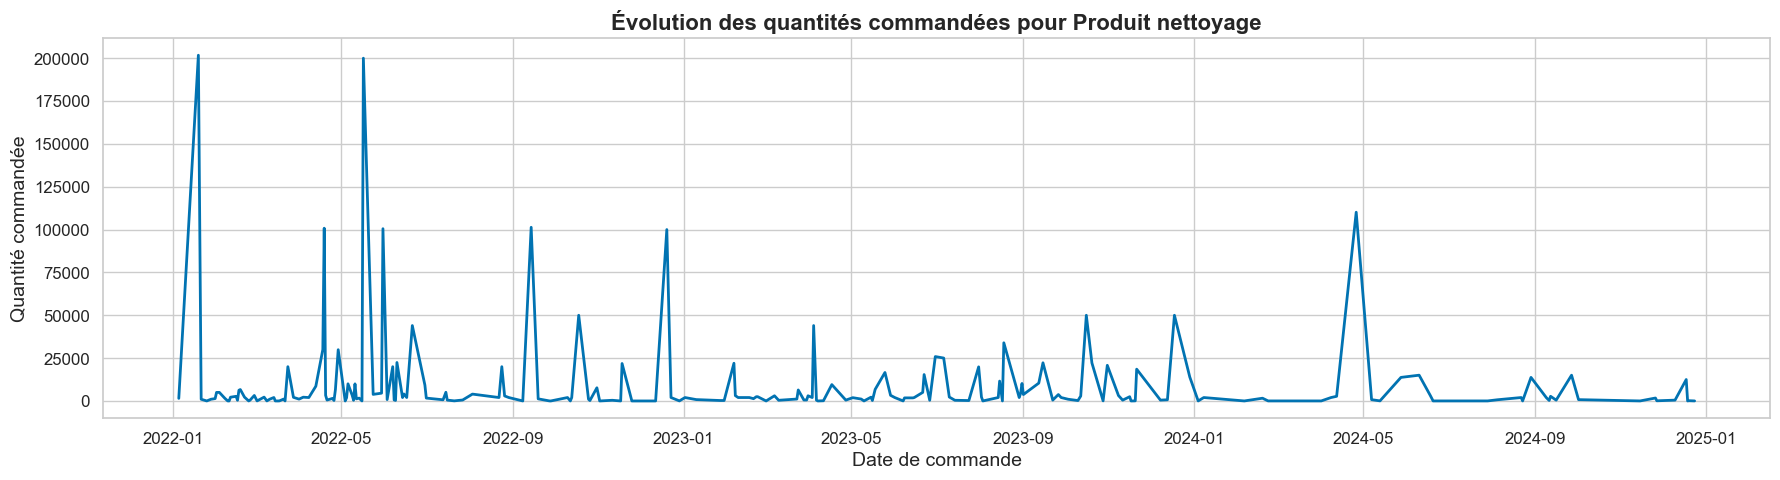

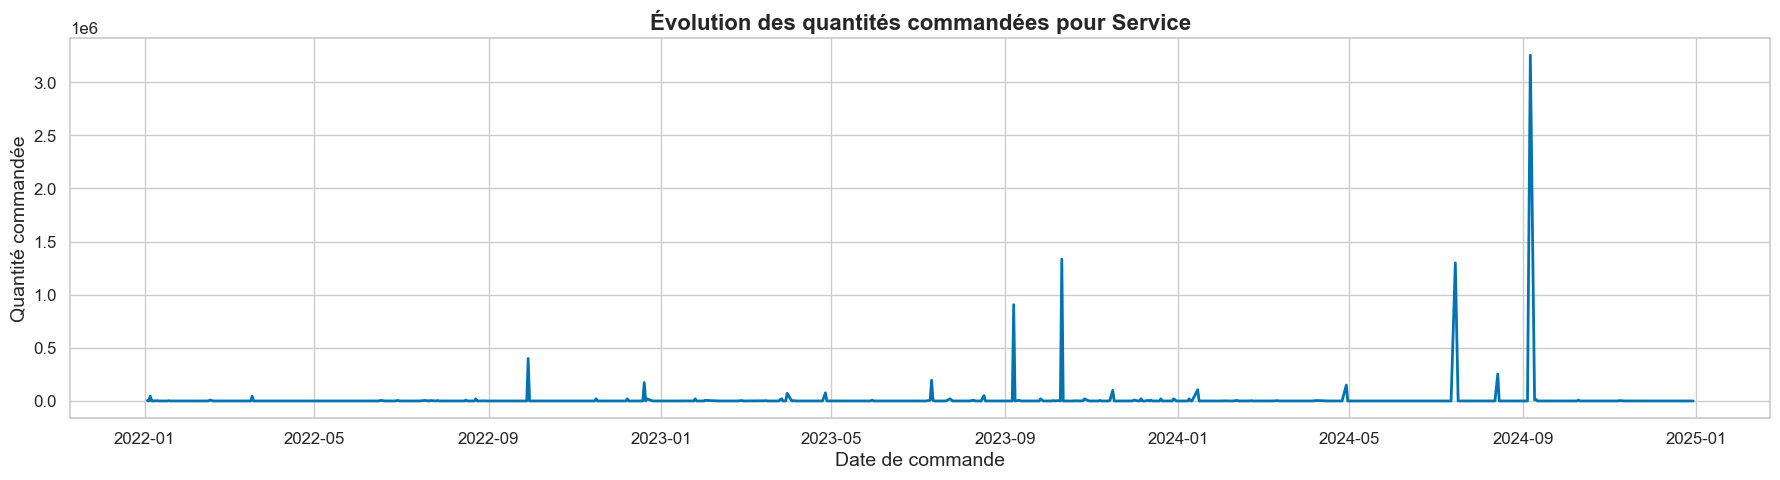

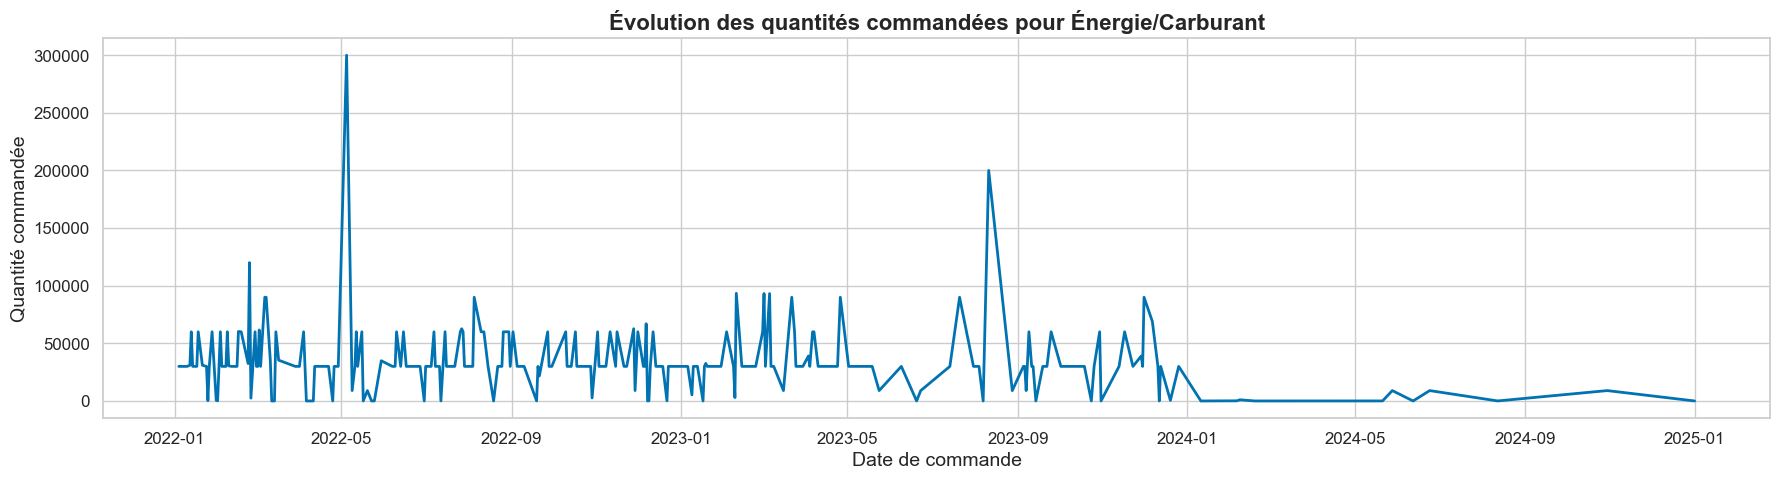

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouper par date et type d'article pour obtenir la somme des quantit√©s
df_evolution = achats.groupby(['Date commande', 'Type article'])['quantit√©'].sum().reset_index()

# R√©organiser les donn√©es pour que chaque type d'article ait sa propre courbe
df_pivot = df_evolution.pivot(index='Date commande', columns='Type article', values='quantit√©')

# Style moderne et lisible
sns.set(style="whitegrid", palette="colorblind", font_scale=1.1)

# Tracer chaque type d'article dans une courbe s√©par√©e
for col in df_pivot.columns:
    plt.figure(figsize=(18, 5))  # Cr√©er une nouvelle figure pour chaque type d'article
    sns.lineplot(data=df_pivot, x=df_pivot.index, y=col, linewidth=2)
    
    # Titres et axes
    plt.title(f"√âvolution des quantit√©s command√©es pour {col}", fontsize=16, weight='bold')
    plt.xlabel("Date de commande", fontsize=14)
    plt.ylabel("Quantit√© command√©e", fontsize=14)
    
    # Afficher la courbe
    plt.tight_layout()
    plt.show()







In [70]:
# Calculer la fr√©quence par mois PAR TYPE D'ARTICLE
frequence_par_type = achats.groupby('Type article')['Date commande'].count() / achats.groupby('Type article')['Date commande'].apply(lambda x: x.dt.to_period('M').nunique())
achats = achats.merge(frequence_par_type.rename('Fr√©quence'), on='Type article')



In [71]:
print(frequence_par_type.describe())


count      8.000000
mean      79.539370
std      135.224923
min       11.592593
25%       12.830882
50%       16.225694
75%       56.722222
max      394.891892
Name: Date commande, dtype: float64


C:\Users\MEDIA TEK\AppData\Local\Temp\ipykernel_16992\660489016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=achats, x='Type article', y='Fr√©quence', order=order, palette='Blues_d')


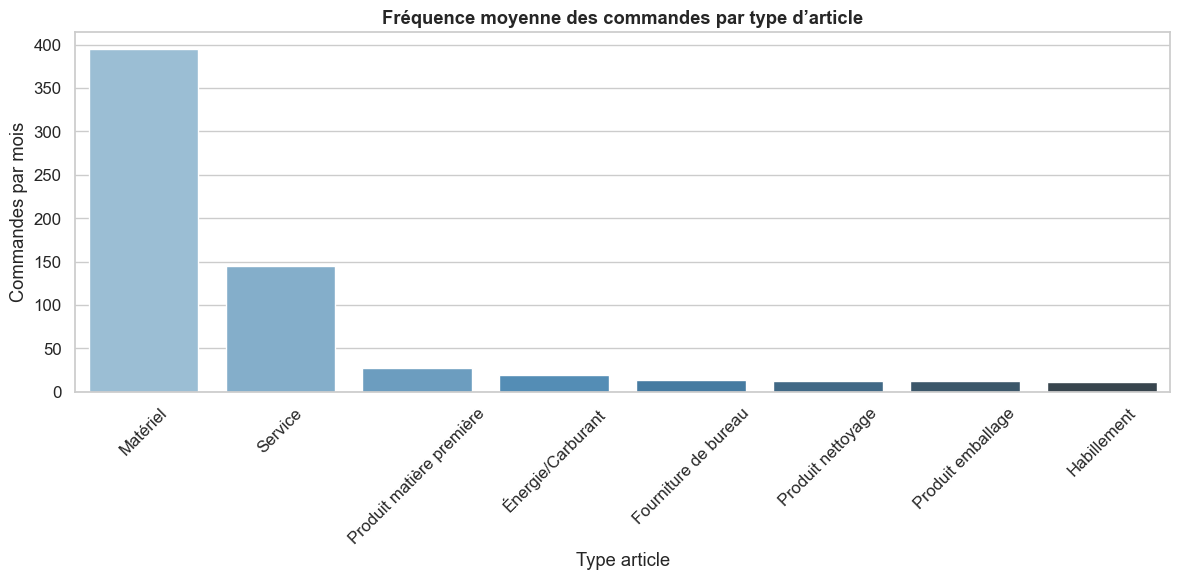

In [72]:
plt.figure(figsize=(12, 6))
order = achats.groupby('Type article')['Fr√©quence'].mean().sort_values(ascending=False).index
sns.barplot(data=achats, x='Type article', y='Fr√©quence', order=order, palette='Blues_d')
plt.title('Fr√©quence moyenne des commandes par type d‚Äôarticle', weight='bold')
plt.ylabel('Commandes par mois')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:

# Afficher les premi√®res et derni√®res dates de commande
print("Premi√®re date de commande :", achats['Date commande'].min())
print("Derni√®re date de commande :", achats['Date commande'].max())

Premi√®re date de commande : 2022-01-03 00:00:00
Derni√®re date de commande : 2025-01-01 00:00:00


In [74]:
def definir_horizon_par_frequence(freq):
    if freq <= 13:        # fr√©quence basse (<= m√©diane)
        return 60          # horizon long terme
    elif freq <= 27.41:   # fr√©quence moyenne
        return 30          # horizon moyen terme
    else:                 # fr√©quence √©lev√©e
        return 7           # horizon court terme

achats['Horizon'] = achats['Fr√©quence'].apply(definir_horizon_par_frequence)


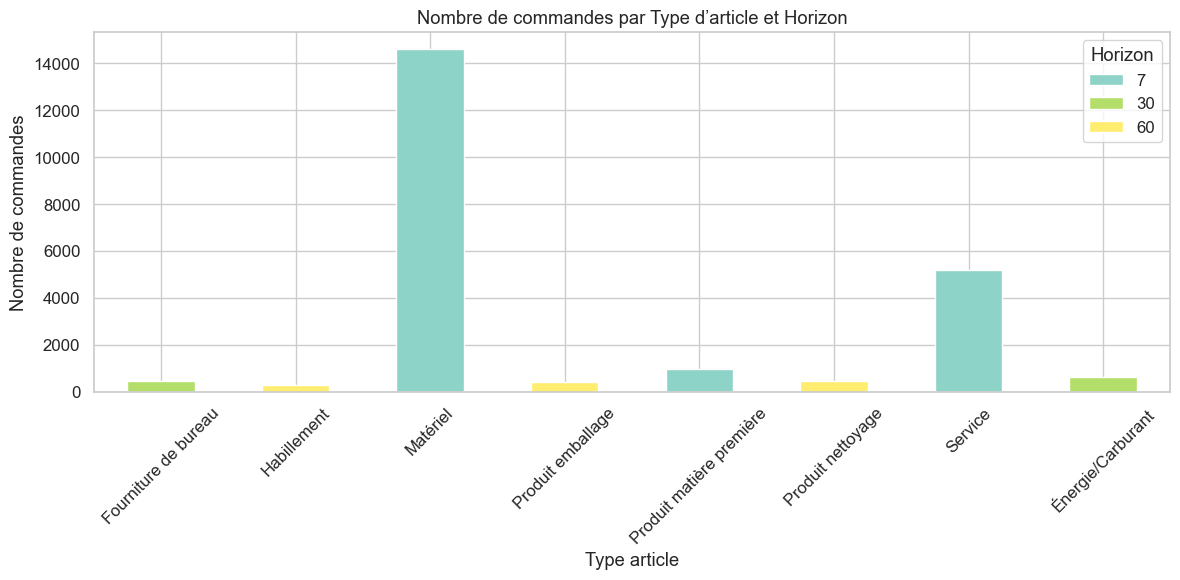

In [75]:
pivot = achats.groupby(['Type article', 'Horizon']).size().unstack(fill_value=0)

pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Nombre de commandes par Type d‚Äôarticle et Horizon')
plt.xlabel('Type article')
plt.ylabel('Nombre de commandes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [76]:
 #Sauvegarder le DataFrame mis √† jour dans un fichier CSV
achats.to_csv('achats_streamlit.csv', index=False)

print("Fichier CSV sauvegard√© : achats_streamlit.csv")

Fichier CSV sauvegard√© : achats_streamlit.csv


In [77]:
# 1. D√©tection des bornes IQR
Q1 = achats['quantit√©'].quantile(0.25)
Q3 = achats['quantit√©'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# 2. D√©tection des index des outliers
outliers_index = achats[(achats['quantit√©'] < lower) | (achats['quantit√©'] > upper)].index

# 3. Affichage des outliers d√©tect√©s
print("Liste des outliers d√©tect√©s :")
print(achats.loc[outliers_index, ['quantit√©']])

# 4. Remplacement des outliers par la m√©diane
median_value = achats['quantit√©'].median()
achats.loc[outliers_index, 'quantit√©'] = median_value

Liste des outliers d√©tect√©s :
       quantit√©
1       30000.0
2       45000.0
3        3402.0
5       40000.0
8        1500.0
...         ...
23048      30.0
23049      30.0
23067      36.0
23068  253440.0
23082      30.0

[3833 rows x 1 columns]


In [78]:
print(achats.columns)


Index(['N¬∞commande', 'Code article', 'Article ', 'Type article', 'Quantit√©',
       'UM', 'Date commande', 'Date r√©ception', 'conformit√©',
       'Code Fournisseur', 'Nom Fournisseur', 'adresse', 'quantit√©',
       'Co√ªt unitaire', 'Taux de conformit√© (%)', 'Nombre de commandes',
       'Respect_d√©lais', 'Taux de Respect (%)', 'Co√ªt unitaire normalis√©',
       'Nombre commandes normalis√©', 'Score', 'Cat√©gorie', 'Fr√©quence',
       'Horizon'],
      dtype='object')


In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import time
# Pr√©paration des donn√©es
achats['Date commande'] = pd.to_datetime(achats['Date commande'])
# Extraire le mois, l'ann√©e et le trimestre
achats['Mois'] = achats['Date commande'].dt.month
achats['Ann√©e'] = achats['Date commande'].dt.year
achats['Jour'] = achats['Date commande'].dt.day





# Cr√©er 'Article_Fournisseur' 
# 7. Cr√©ation d'une variable combin√©e 'Article_Fournisseur' pour l'analyse
achats['Article_Fournisseur'] = achats['Article '] + " - " + achats['Nom Fournisseur']
achats['Code article'] = achats['Code article'].str.strip()
# Cr√©er l'encodeur
le = LabelEncoder()
# Cr√©er l'encodeur pour les colonnes 'Code article' et 'Code Fournisseur'
le_article = LabelEncoder()

# Encoder la colonne "Type article"
achats['Type article_encoded'] = le.fit_transform(achats['Type article'])
# Encoder les colonnes 'Code article' et 'Code Fournisseur'
achats['Code article_encoded'] = le_article.fit_transform(achats['Code article'])


# S√©lectionner les features √† utiliser dans le mod√®le
features = [
    'Type article_encoded', 'Mois', 'Ann√©e', 'Horizon', 'Code article_encoded', 'Code Fournisseur', 'Jour', 
]


# Pr√©parer les donn√©es
X = achats[features]
y = np.log1p(achats['quantit√©'])

# Diviser les donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Entra√Ænement
rf_model = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=30, min_samples_split=5)

start_train = time.time()
rf_model.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train



# Pr√©dictions
start_pred = time.time()
rf_predictions = np.expm1(rf_model.predict(X_test))
end_pred = time.time()
prediction_time = end_pred - start_pred

y_test_raw = np.expm1(y_test)

# √âvaluer
rmse = root_mean_squared_error(y_test_raw, rf_predictions)
mae = mean_absolute_error(y_test_raw, rf_predictions)
mse = mean_squared_error(y_test_raw, rf_predictions)

r2 = r2_score(y_test_raw, rf_predictions)

print("\nüîπ [Random Forest] R√©sultats de performance :")

print(f"RMSE : {rmse:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R¬≤   : {r2:.4f}")

print(f"‚è±Ô∏è Temps d'entra√Ænement : {training_time:.4f} secondes")
print(f"‚è±Ô∏è Temps de pr√©diction  : {prediction_time:.4f} secondes")




üîπ [Random Forest] R√©sultats de performance :
RMSE : 2.3072
MSE  : 5.3232
MAE  : 1.1467
R¬≤   : 0.3740
‚è±Ô∏è Temps d'entra√Ænement : 10.3905 secondes
‚è±Ô∏è Temps de pr√©diction  : 0.2348 secondes


In [81]:


# Afficher les r√©sultats
results = X_test.copy()
results['Article_Fournisseur'] = achats.loc[X_test.index, 'Article_Fournisseur'].values
results['Quantit√©_Pr√©dite_RF'] = rf_predictions
results['Quantit√©_R√©elle'] = y_test_raw
results['Erreur_Absolue'] = np.abs(results['Quantit√©_Pr√©dite_RF'] - results['Quantit√©_R√©elle'])
results['Date commande'] = achats.loc[X_test.index, 'Date commande'].values
results['Type article'] = achats.loc[X_test.index, 'Type article'].values
results['UM'] = achats.loc[X_test.index, 'UM'].values
results[['Article_Fournisseur','Type article', 'Date commande', 'Horizon', 'Quantit√©_Pr√©dite_RF', 'Quantit√©_R√©elle', 'Erreur_Absolue','UM']].head()



Article_Fournisseur Type article  \
1215      analyse bacteriologique        - Soci√©t√© Saeed      Service   
9645     Couvercle2541648-0000          - Soci√©t√© Gharbi     Mat√©riel   
21646  R√©paration Palette             - Soci√©t√© Ben l...      Service   
16349   SCREW 6-4722525101/90458-0072  - Soci√©t√© Belhadj     Mat√©riel   
11237   Confection pi√©ces -Mars 2023   - Soci√©t√© Khalifa      Service   

      Date commande  Horizon  Quantit√©_Pr√©dite_RF  Quantit√©_R√©elle  \
1215     2022-03-08        7             3.119009              4.0   
9645     2023-01-17        7             1.067266              1.0   
21646    2024-02-12        7             1.867350              1.0   
16349    2023-01-05        7             3.132615              3.0   
11237    2023-04-05        7             1.144812              1.0   

       Erreur_Absolue  UM  
1215         0.880991  UN  
9645         0.067266  PI  
21646        0.867350  PI  
16349        0.132615  PI  
11237        0.144812  PI

In [82]:
# Pr√©dictions sur les donn√©es d'entra√Ænement
y_train_pred = np.expm1(rf_model.predict(X_train))  # on inverse log1p()
y_test_pred = np.expm1(rf_model.predict(X_test))    # d√©j√† fait plus haut, mais c'est ok ici aussi

# Inverser la transformation log1p sur y_train et y_test
y_train_raw = np.expm1(y_train)
y_test_raw = np.expm1(y_test)

# Calcul des scores R¬≤
r2_train = r2_score(y_train_raw, y_train_pred)
r2_test = r2_score(y_test_raw, y_test_pred)

# Affichage
print(f"R¬≤ (Train): {r2_train:.4f}")
print(f"R¬≤ (Test) : {r2_test:.4f}")



R¬≤ (Train): 0.6715
R¬≤ (Test) : 0.3740


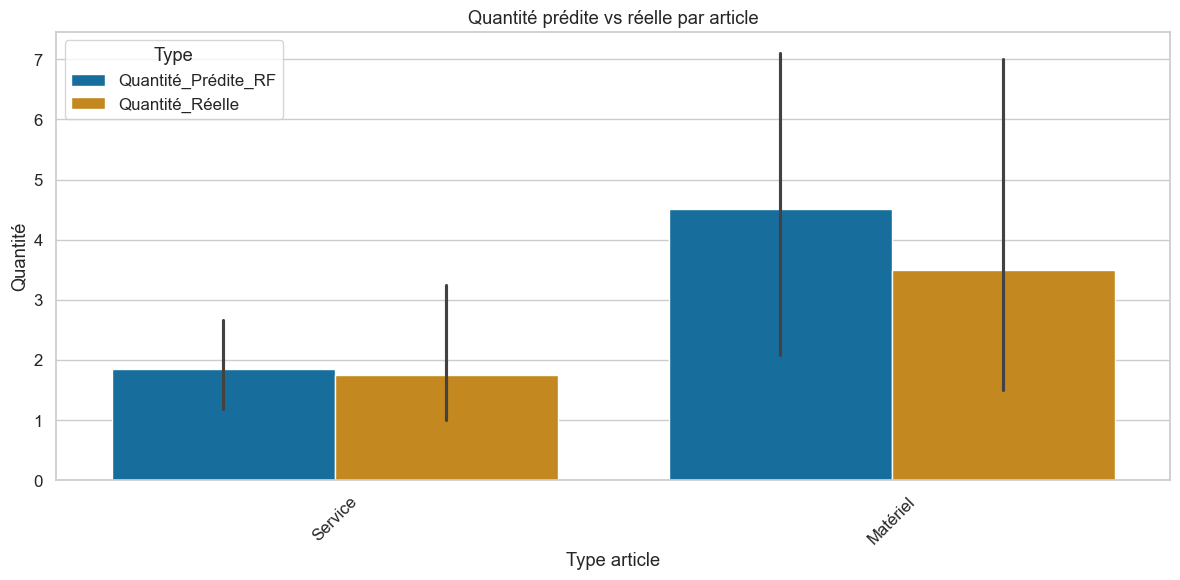

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple : afficher les 10 premiers articles
df_plot = results[['Type article', 'Quantit√©_Pr√©dite_RF', 'Quantit√©_R√©elle']].head(10)

# Mise en forme "long format" pour Seaborn
df_melt = df_plot.melt(id_vars='Type article', 
                       value_vars=['Quantit√©_Pr√©dite_RF', 'Quantit√©_R√©elle'], 
                       var_name='Type', 
                       value_name='Quantit√©')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='Type article', y='Quantit√©', hue='Type')
plt.xticks(rotation=45)
plt.title('Quantit√© pr√©dite vs r√©elle par article')
plt.tight_layout()
plt.show()


In [84]:
achats

N¬∞commande Code article                               Article   \
0        22000002     HSDR0007  SRTJ du E2:E13530/11/2021.              
1        22000002     P6311047         FUEL LOURD N¬∞2                   
2        22000003    M30511105          FILM THERMOR√âTRACTABLE NG 40¬µ   
3        22000003     HSDLI007         reparation palettes              
4        22000003     P9523007         Glasse de niv Type A N¬∞7 A/JTS   
...           ...          ...                                    ...   
23078    24900731    HSCLN0015         frais de participation           
23079    24900731    HSCLN0015         hebergement                      
23080    24900732    HSCLN0014         Abonnement salle de sport        
23081    24900733    HSCLN0032         disque dur externe SSD 512 go    
23082   922000015     P5611013         COLLIER DE SERRAGE 8/14          

                   Type article  Quantit√©  UM Date commande Date r√©ception  \
0      Produit mati√®re premi√®re       1.0  UN    2022-01-03     2022-01-12   
1             √ânergie/Carburant      30.0  TN    2022-01-04     2022-01-20   
2                       Service   45000.0  KG    2022-01-05     2022-01-30   
3                       Service    3402.0  UN    2022-01-03     2022-01-15   
4                      Mat√©riel       2.0  PC    2022-01-04     2022-01-10   
...                         ...       ...  ..           ...            ...   
23078                   Service       2.0  PI    2024-10-24     2024-10-31   
23079                   Service       2.0  PI    2024-10-24     2024-10-31   
23080                   Service       1.0  PI    2024-10-24     2024-10-31   
23081                  Mat√©riel       1.0  PI    2024-10-24     2024-10-31   
23082                  Mat√©riel      30.0  PI    2022-01-05     2022-01-08   

       conformit√©  Code Fournisseur  ...     Score Cat√©gorie   Fr√©quence  \
0               1           5006997  ...  6.825537     Moyen   27.416667   
1               1           5005182  ...  6.886661     Moyen   19.312500   
2               1           5006889  ...  6.852617     Moyen  144.638889   
3               1           5007369  ...  6.935975     Moyen  144.638889   
4               1           5005182  ...  6.883973     Moyen  394.891892   
...           ...               ...  ...       ...       ...         ...   
23078           1            559911  ...  7.025381     Moyen  144.638889   
23079           1            559911  ...  7.025392     Moyen  144.638889   
23080           1            559911  ...  7.025380     Moyen  144.638889   
23081           1            550645  ...  6.962161     Moyen  394.891892   
23082           1           5005182  ...  6.886969     Moyen  394.891892   

       Horizon  Mois  Ann√©e  Jour  \
0            7     1   2022     3   
1           30     1   2022     4   
2            7     1   2022     5   
3            7     1   2022     3   
4            7     1   2022     4   
...        ...   ...    ...   ...   
23078        7    10   2024    24   
23079        7    10   2024    24   
23080        7    10   2024    24   
23081        7    10   2024    24   
23082        7     1   2022     5   

                                     Article_Fournisseur  \
0      SRTJ du E2:E13530/11/2021.            - Soci√©t...   
1        FUEL LOURD N¬∞2                 - Soci√©t√© Gharbi   
2        FILM THERMOR√âTRACTABLE NG 40¬µ - Soci√©t√© Hammami   
3         reparation palettes            - Soci√©t√© Allah   
4        Glasse de niv Type A N¬∞7 A/JTS - Soci√©t√© Gharbi   
...                                                  ...   
23078  frais de participation         - Soci√©t√© Ben M...   
23079  hebergement                    - Soci√©t√© Ben M...   
23080  Abonnement salle de sport      - Soci√©t√© Ben M...   
23081  disque dur externe SSD 512 go  - Soci√©t√© Ben n...   
23082    COLLIER DE SERRAGE 8/14        - Soci√©t√© Gharbi   

       Type article_encoded  Code article_encoded  
0                     

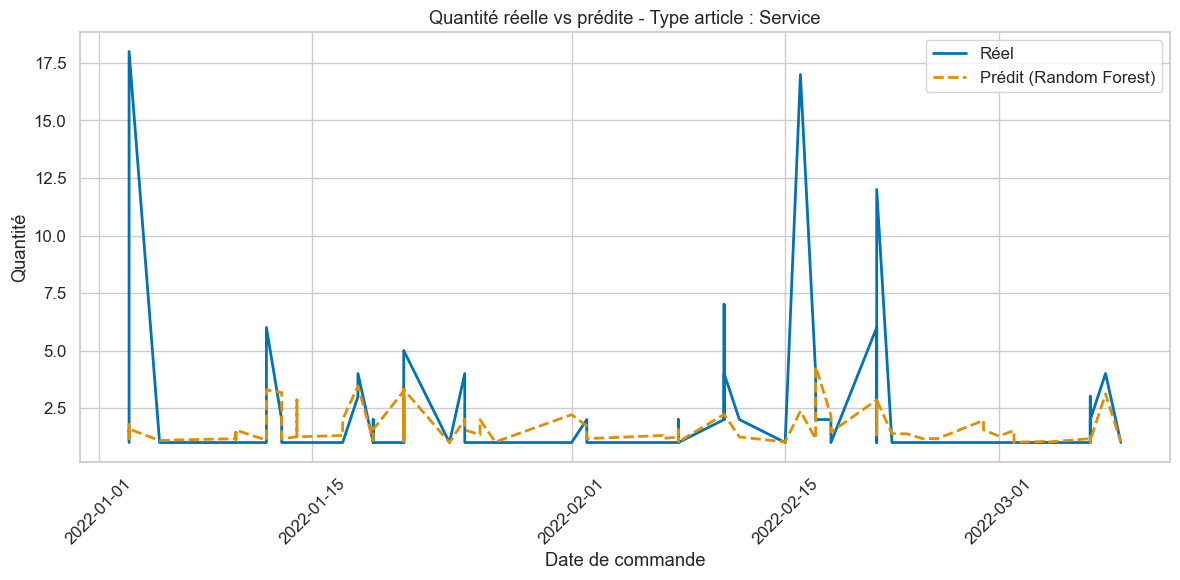

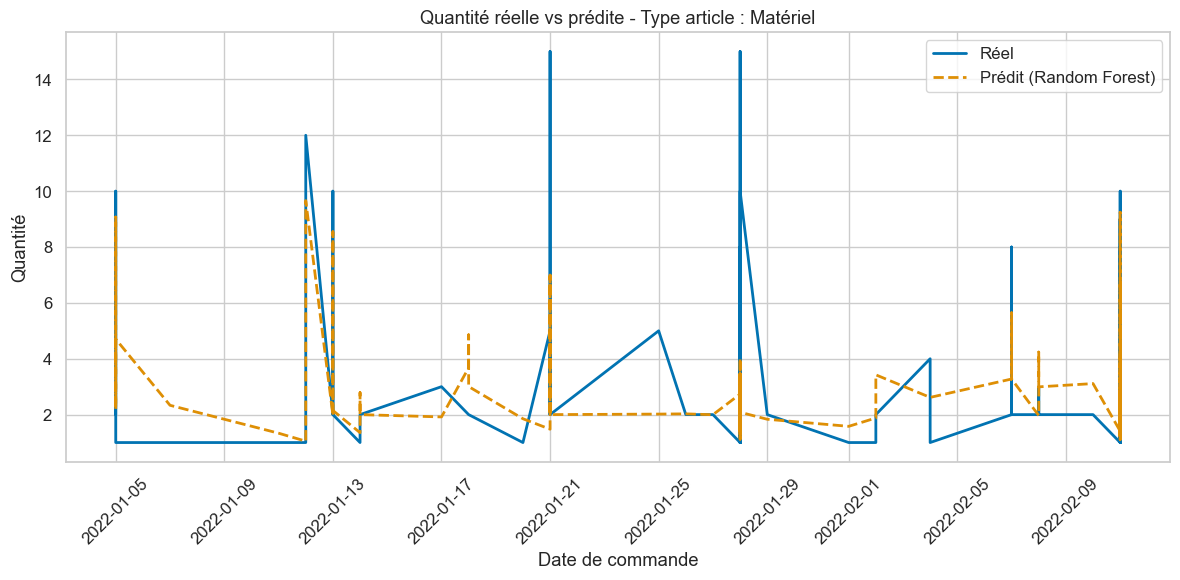

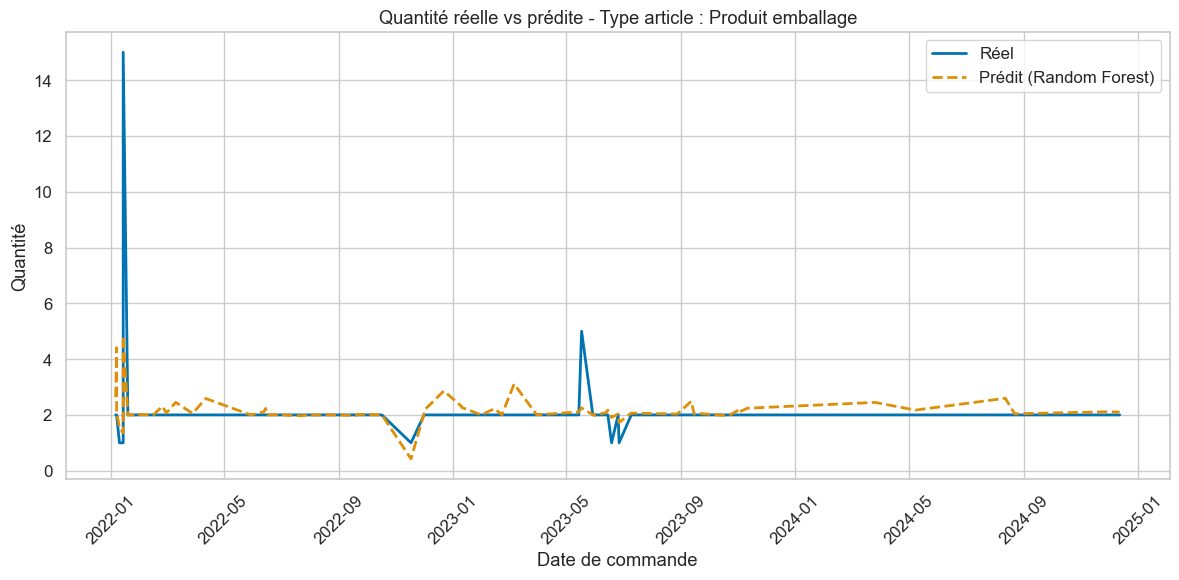

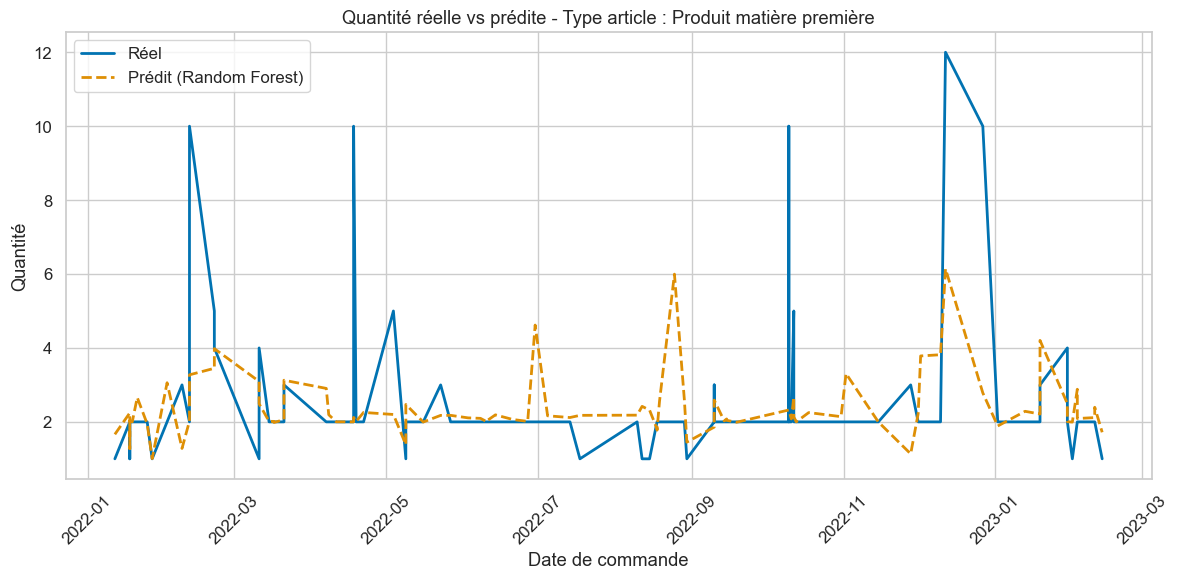

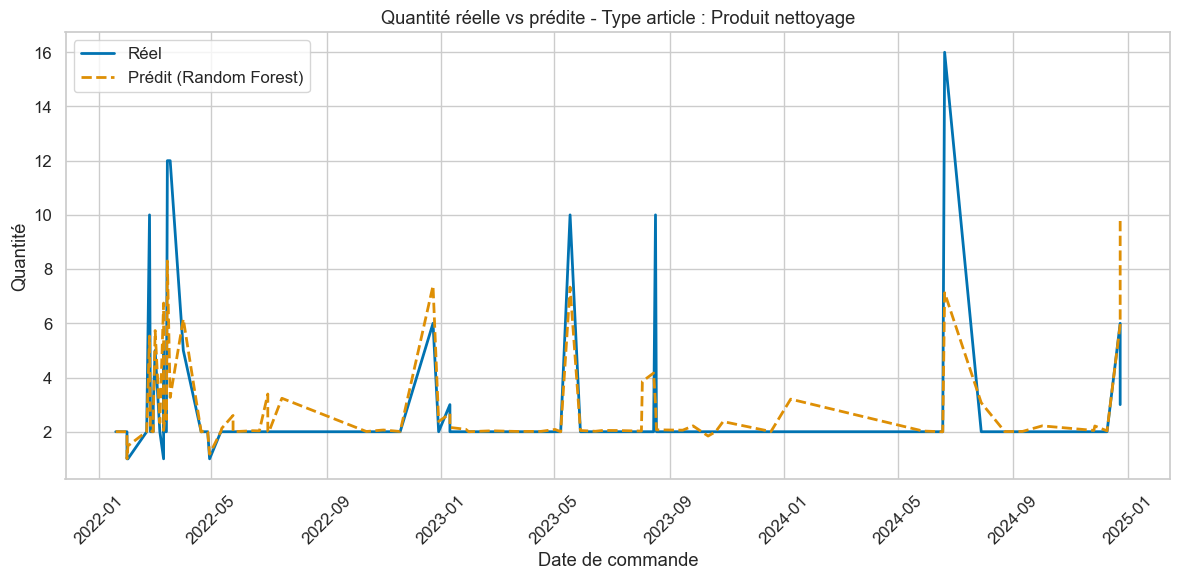

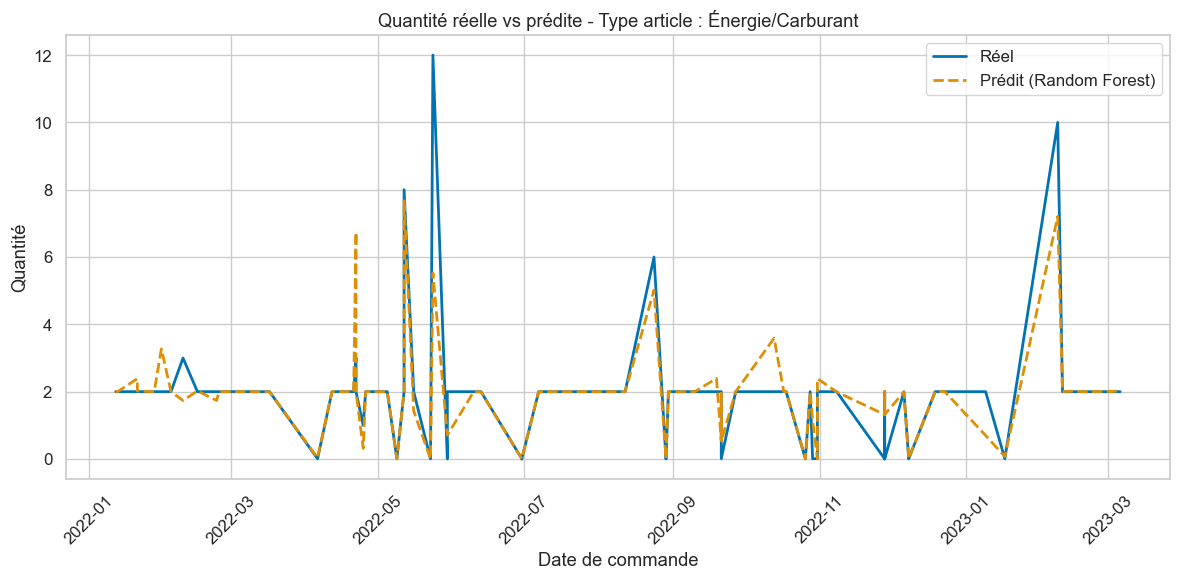

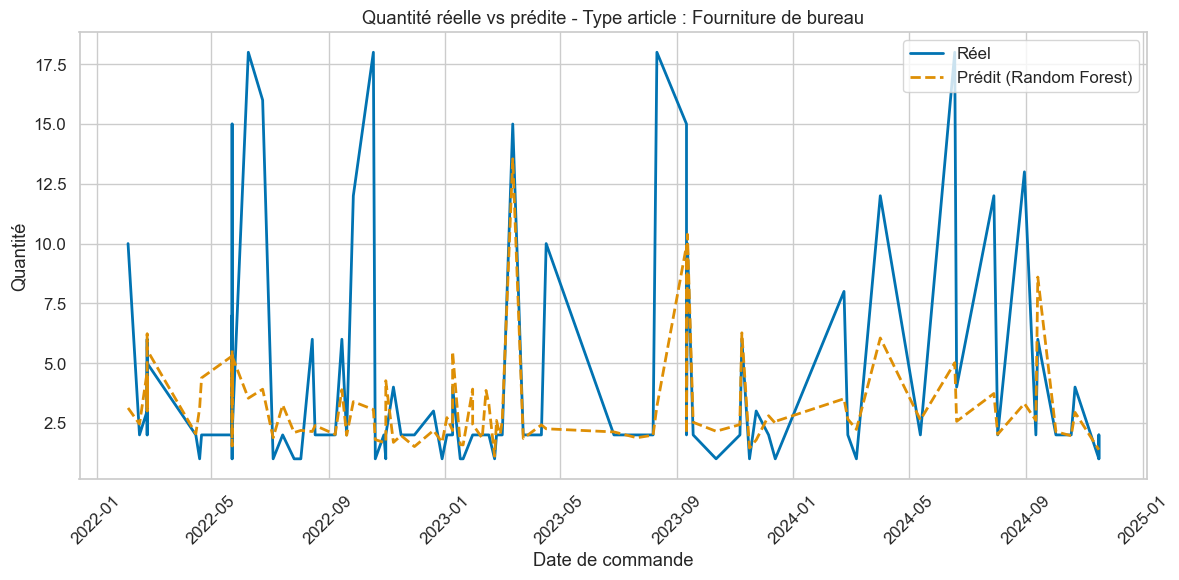

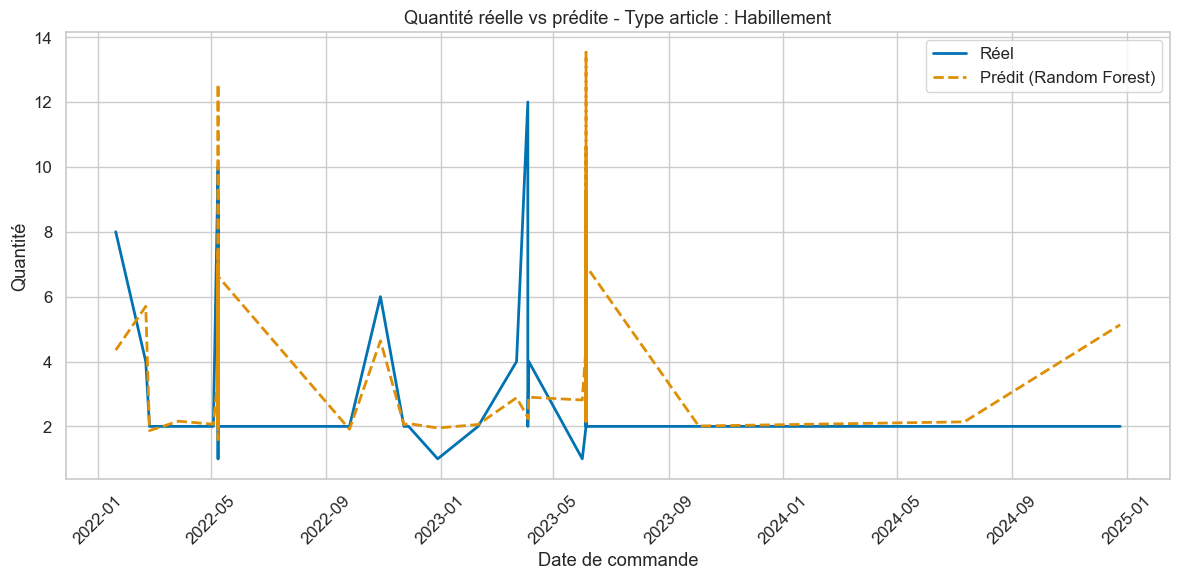

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# S'assurer que les dates sont bien en datetime
results['Date commande'] = pd.to_datetime(results['Date commande'])

# Obtenir la liste des types d'article uniques
types_articles = results["Type article"].unique()

# Tracer chaque type d'article dans un graphique s√©par√©, limit√© aux 50 premiers points
for type_article in types_articles:
    df_type = results[results["Type article"] == type_article].sort_values('Date commande')
    df_type_50 = df_type.head(100)  # prendre uniquement les 50 premiers

    plt.figure(figsize=(12, 6))
    plt.plot(df_type_50['Date commande'], df_type_50['Quantit√©_R√©elle'], label='R√©el', linewidth=2)
    plt.plot(df_type_50['Date commande'], df_type_50['Quantit√©_Pr√©dite_RF'], label='Pr√©dit (Random Forest)', linestyle='--', linewidth=2)
    plt.title(f"Quantit√© r√©elle vs pr√©dite - Type article : {type_article}")
    plt.xlabel('Date de commande')
    plt.ylabel('Quantit√©')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


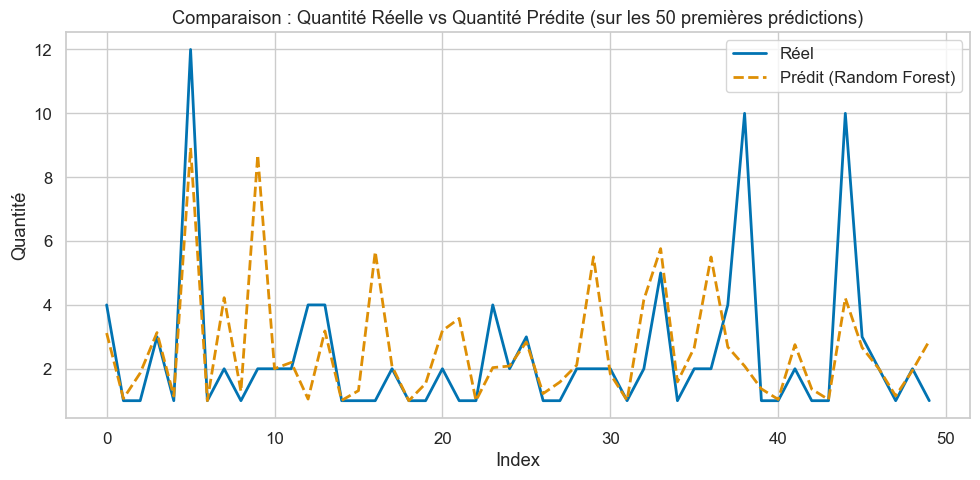

In [86]:
import matplotlib.pyplot as plt

# Suppose que tu as un DataFrame 'results' contenant les colonnes 'Quantit√©_R√©elle' et 'Quantit√©_Pr√©dite'
results = pd.DataFrame({
    'Quantit√©_R√©elle': y_test_raw[:50],       # valeurs r√©elles
    'Quantit√©_Pr√©dite_RF': rf_predictions[:50]   # valeurs pr√©dites
})

plt.figure(figsize=(10, 5))
plt.plot(results['Quantit√©_R√©elle'].values, label='R√©el', linewidth=2)
plt.plot(results['Quantit√©_Pr√©dite_RF'].values, label='Pr√©dit (Random Forest)', linestyle='--', linewidth=2)
plt.title('Comparaison : Quantit√© R√©elle vs Quantit√© Pr√©dite (sur les 50 premi√®res pr√©dictions)')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [87]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Meilleurs param√®tres :", grid_search.best_params_)

Meilleurs param√®tres : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [88]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Meilleurs param√®tres trouv√©s par GridSearchCV
best_params = {
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 200
}

# Entra√Ænement avec XGBoost
xgb_model = XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Entra√Ænement du mod√®le avec mesure du temps
start_train = time.time()
xgb_model.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# Pr√©dictions avec mesure du temps
start_pred = time.time()
xgb_predictions = np.expm1(xgb_model.predict(X_test))
end_pred = time.time()
prediction_time = end_pred - start_pred

# √âvaluation des performances
xgb_mse = mean_squared_error(y_test_raw, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test_raw, xgb_predictions)
xgb_r2 = r2_score(y_test_raw, xgb_predictions)

# Affichage des r√©sultats
print("\nüîπ [XGBoost] R√©sultats de performance :")

print(f"RMSE : {xgb_rmse}")
print(f"MSE  : {xgb_mse}")
print(f"MAE  : {xgb_mae}")
print(f"R¬≤   : {xgb_r2}")

print(f"‚è±Ô∏è Temps d'entra√Ænement : {training_time:.4f} secondes")
print(f"‚è±Ô∏è Temps de pr√©diction  : {prediction_time:.4f} secondes")

# R√©sultats XGBoost
results_xgb = X_test.copy()
results_xgb['Article_Fournisseur'] = achats.loc[X_test.index, 'Article_Fournisseur'].values
results_xgb['Quantit√©_Predite_XGB'] = xgb_predictions
results_xgb['Quantit√©_R√©elle'] = y_test_raw
results_xgb['Erreur_Absolue'] = np.abs(results_xgb['Quantit√©_Predite_XGB'] - results_xgb['Quantit√©_R√©elle'])
results_xgb['Date commande'] = achats.loc[X_test.index, 'Date commande'].values
results_xgb['Type article'] = achats.loc[X_test.index, 'Type article'].values
print("\nExtrait des r√©sultats XGBoost :")
results_xgb[['Article_Fournisseur', 'Type article','Date commande','Horizon', 'Quantit√©_Predite_XGB', 'Quantit√©_R√©elle', 'Erreur_Absolue']].head()




üîπ [XGBoost] R√©sultats de performance :
RMSE : 2.682973015106943
MSE  : 7.19834419979204
MAE  : 1.46005680445755
R¬≤   : 0.15342911656811364
‚è±Ô∏è Temps d'entra√Ænement : 0.2596 secondes
‚è±Ô∏è Temps de pr√©diction  : 0.0080 secondes

Extrait des r√©sultats XGBoost :


Article_Fournisseur Type article  \
1215      analyse bacteriologique        - Soci√©t√© Saeed      Service   
9645     Couvercle2541648-0000          - Soci√©t√© Gharbi     Mat√©riel   
21646  R√©paration Palette             - Soci√©t√© Ben l...      Service   
16349   SCREW 6-4722525101/90458-0072  - Soci√©t√© Belhadj     Mat√©riel   
11237   Confection pi√©ces -Mars 2023   - Soci√©t√© Khalifa      Service   

      Date commande  Horizon  Quantit√©_Predite_XGB  Quantit√©_R√©elle  \
1215     2022-03-08        7              2.371935              4.0   
9645     2023-01-17        7              1.437752              1.0   
21646    2024-02-12        7              1.998791              1.0   
16349    2023-01-05        7              2.539689              3.0   
11237    2023-04-05        7              1.650312              1.0   

       Erreur_Absolue  
1215         1.628065  
9645         0.437752  
21646        0.998791  
16349        0.460311  
11237        0.650312

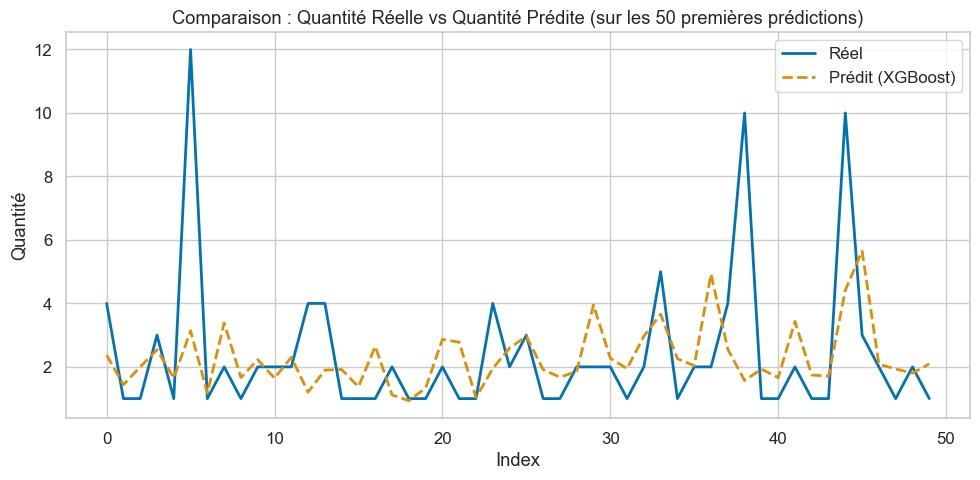

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Suppose que tu as un DataFrame 'results_xgb' contenant les colonnes 'Quantit√©_R√©elle' et 'Quantit√©_Pr√©dite'
results_xgb = pd.DataFrame({
    'Quantit√©_R√©elle': y_test_raw[:50],       # valeurs r√©elles
    'Quantit√©_Predite_XGB': xgb_predictions[:50]  # valeurs pr√©dites
})

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(results_xgb['Quantit√©_R√©elle'].values, label='R√©el', linewidth=2)
plt.plot(results_xgb['Quantit√©_Predite_XGB'].values, label='Pr√©dit (XGBoost)', linestyle='--', linewidth=2)
plt.title('Comparaison : Quantit√© R√©elle vs Quantit√© Pr√©dite (sur les 50 premi√®res pr√©dictions)')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [90]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Entra√Ænement avec CatBoost
catboost_model = CatBoostRegressor(
    iterations=500,
    depth=10,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bylevel=1.0,
    random_state=42,
    silent=True  # D√©sactive les logs pendant l'entra√Ænement
)

# Entra√Ænement du mod√®le avec mesure du temps
start_train = time.time()
catboost_model.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# Pr√©dictions avec mesure du temps
start_pred = time.time()
catboost_predictions = np.expm1(catboost_model.predict(X_test))
end_pred = time.time()
prediction_time = end_pred - start_pred

# √âvaluation des performances
catboost_mse = mean_squared_error(y_test_raw, catboost_predictions)
catboost_rmse = np.sqrt(catboost_mse)
catboost_mae = mean_absolute_error(y_test_raw, catboost_predictions)
catboost_r2 = r2_score(y_test_raw, catboost_predictions)

# Affichage des r√©sultats
print("\nüîπ [CatBoost] R√©sultats de performance :")

print(f"RMSE : {catboost_rmse}")
print(f"MSE  : {catboost_mse}")
print(f"MAE  : {catboost_mae}")

print(f"R¬≤   : {catboost_r2}")
print(f"‚è±Ô∏è Temps d'entra√Ænement : {training_time:.4f} secondes")
print(f"‚è±Ô∏è Temps de pr√©diction  : {prediction_time:.4f} secondes")

# R√©sultats CatBoost
results_catboost = X_test.copy()
results_catboost['Article_Fournisseur'] = achats.loc[X_test.index, 'Article_Fournisseur'].values
results_catboost['Quantit√©_Predite_CB'] = catboost_predictions
results_catboost['Quantit√©_R√©elle'] = y_test_raw
results_catboost['Erreur_Absolue'] = np.abs(results_catboost['Quantit√©_Predite_CB'] - results_catboost['Quantit√©_R√©elle'])
results_catboost['Date commande'] = achats.loc[X_test.index, 'Date commande'].values
results_catboost['Type article'] = achats.loc[X_test.index, 'Type article'].values
print("\nExtrait des r√©sultats CatBoost :")


results_catboost[['Article_Fournisseur', 'Type article', 'Date commande', 'Horizon', 'Quantit√©_Predite_CB', 'Quantit√©_R√©elle', 'Erreur_Absolue']].head()



üîπ [CatBoost] R√©sultats de performance :
RMSE : 2.664792748397183
MSE  : 7.101120391910213
MAE  : 1.44200305725898
R¬≤   : 0.16486325234221422
‚è±Ô∏è Temps d'entra√Ænement : 6.8932 secondes
‚è±Ô∏è Temps de pr√©diction  : 0.0156 secondes

Extrait des r√©sultats CatBoost :


Article_Fournisseur Type article  \
1215      analyse bacteriologique        - Soci√©t√© Saeed      Service   
9645     Couvercle2541648-0000          - Soci√©t√© Gharbi     Mat√©riel   
21646  R√©paration Palette             - Soci√©t√© Ben l...      Service   
16349   SCREW 6-4722525101/90458-0072  - Soci√©t√© Belhadj     Mat√©riel   
11237   Confection pi√©ces -Mars 2023   - Soci√©t√© Khalifa      Service   

      Date commande  Horizon  Quantit√©_Predite_CB  Quantit√©_R√©elle  \
1215     2022-03-08        7             2.666221              4.0   
9645     2023-01-17        7             1.616499              1.0   
21646    2024-02-12        7             1.723900              1.0   
16349    2023-01-05        7             2.638885              3.0   
11237    2023-04-05        7             1.570527              1.0   

       Erreur_Absolue  
1215         1.333779  
9645         0.616499  
21646        0.723900  
16349        0.361115  
11237        0.570527

In [91]:
# S'assurer que les dates sont bien tri√©es
results_catboost['Date commande'] = pd.to_datetime(results['Date commande'])

# Obtenir la liste des types d'article uniques
types_articles = results_catboost["Type article"].unique()

# Tracer chaque type d'article dans un graphique s√©par√©
for type_article in types_articles:
    df_type = results_catboost[results_catboost["Type article"] == type_article].sort_values('Date commande')
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_type['Date commande'], df_type['Quantit√©_R√©elle'], label='R√©el', linewidth=2)
    plt.plot(df_type['Date commande'], df_type['Quantit√©_Predite_CB'], label='Pr√©dit (Catboost)', linestyle='--', linewidth=2)
    plt.title(f"Quantit√© r√©elle vs pr√©dite - Type article : {type_article}")
    plt.xlabel('Date de commande')
    plt.ylabel('Quantit√©')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

KeyError: 'Date commande'

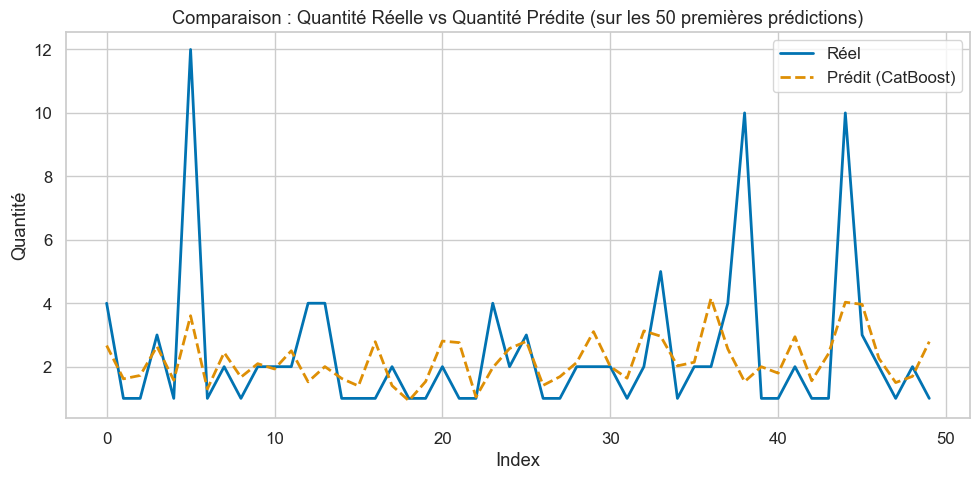

In [ ]:
# Visualisation des r√©sultats
results_catboost_viz = pd.DataFrame({
    'Quantit√©_R√©elle': y_test_raw[:50],       # valeurs r√©elles
    'Quantit√©_Predite_CB': catboost_predictions[:50]  # valeurs pr√©dites
})

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(results_catboost_viz['Quantit√©_R√©elle'].values, label='R√©el', linewidth=2)
plt.plot(results_catboost_viz['Quantit√©_Predite_CB'].values, label='Pr√©dit (CatBoost)', linestyle='--', linewidth=2)
plt.title('Comparaison : Quantit√© R√©elle vs Quantit√© Pr√©dite (sur les 50 premi√®res pr√©dictions)')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


üîπ [Random Forest] R√©sultats de performance :
RMSE : 2.307196985641389
MAE : 1.1467274902086444
R¬≤ : 0.3739629021844144

üîπ [XGBoost] R√©sultats de performance :
RMSE : 2.682973015106943
MAE : 1.46005680445755
R¬≤ : 0.15342911656811364

üîπ [CatBoost] R√©sultats de performance :
RMSE : 2.664792748397183
MAE : 1.44200305725898
R¬≤ : 0.16486325234221422


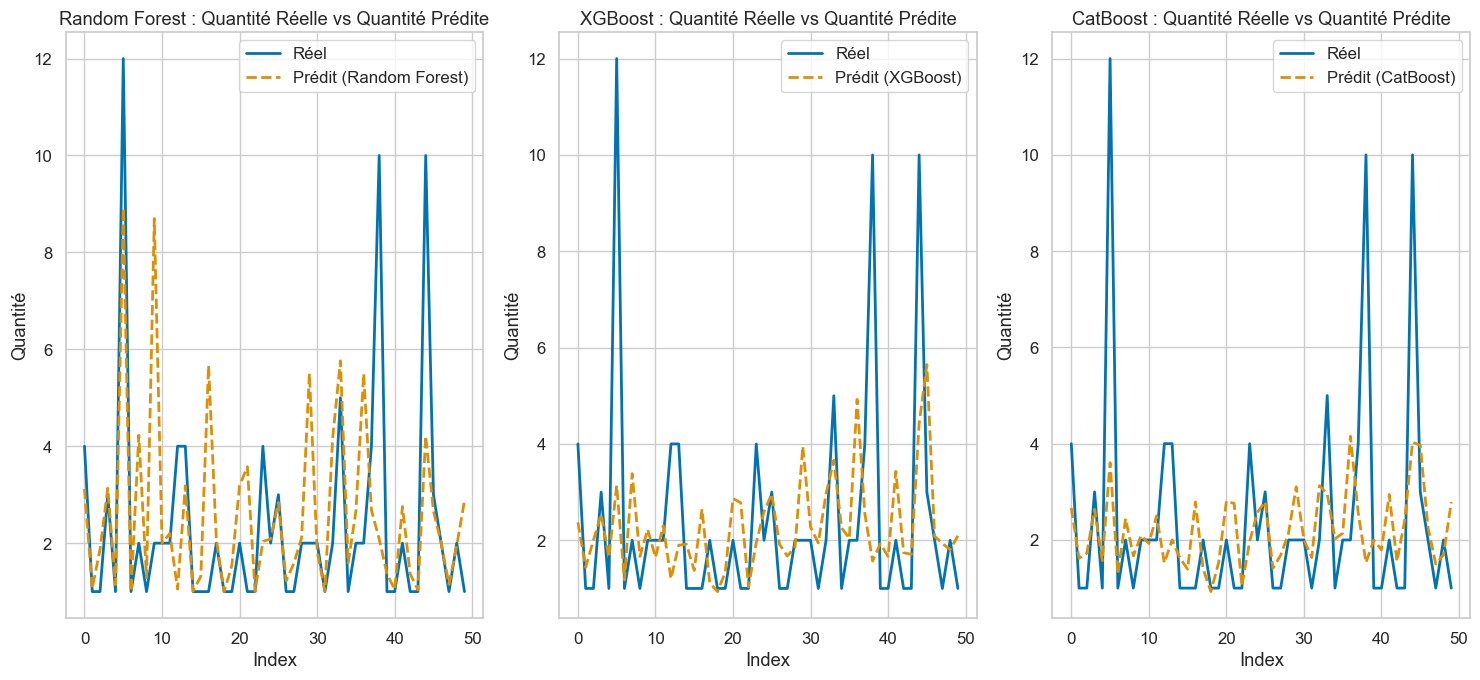


üîπ R√©sum√© des m√©triques pour chaque mod√®le :
           Model      RMSE       MAE        R¬≤
0  Random Forest  2.307197  1.146727  0.373963
1        XGBoost  2.682973  1.460057  0.153429
2       CatBoost  2.664793  1.442003  0.164863


In [ ]:
# Pr√©dictions de chaque mod√®le (on a d√©j√† XGBoost, Random Forest et CatBoost entra√Æn√©s)
rf_predictions = np.expm1(rf_model.predict(X_test))  # Random Forest
xgb_predictions = np.expm1(xgb_model.predict(X_test))  # XGBoost
catboost_predictions = np.expm1(catboost_model.predict(X_test))  # CatBoost

# Calcul des m√©triques pour chaque mod√®le
def print_metrics(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\nüîπ [{model_name}] R√©sultats de performance :")
    print("RMSE :", rmse)
    print("MAE :", mae)
    print("R¬≤ :", r2)
    return rmse, mae, r2

# Affichage des r√©sultats de chaque mod√®le
rf_rmse, rf_mae, rf_r2 = print_metrics(y_test_raw, rf_predictions, "Random Forest")
xgb_rmse, xgb_mae, xgb_r2 = print_metrics(y_test_raw, xgb_predictions, "XGBoost")
catboost_rmse, catboost_mae, catboost_r2 = print_metrics(y_test_raw, catboost_predictions, "CatBoost")

# Comparaison visuelle des pr√©dictions des trois mod√®les
plt.figure(figsize=(15, 7))

# Graphiques pour comparer les trois mod√®les (50 premi√®res pr√©dictions)
plt.subplot(1, 3, 1)
plt.plot(y_test_raw[:50].values, label='R√©el', linewidth=2)
plt.plot(rf_predictions[:50], label='Pr√©dit (Random Forest)', linestyle='--', linewidth=2)
plt.title('Random Forest : Quantit√© R√©elle vs Quantit√© Pr√©dite')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(y_test_raw[:50].values, label='R√©el', linewidth=2)
plt.plot(xgb_predictions[:50], label='Pr√©dit (XGBoost)', linestyle='--', linewidth=2)
plt.title('XGBoost : Quantit√© R√©elle vs Quantit√© Pr√©dite')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(y_test_raw[:50].values, label='R√©el', linewidth=2)
plt.plot(catboost_predictions[:50], label='Pr√©dit (CatBoost)', linestyle='--', linewidth=2)
plt.title('CatBoost : Quantit√© R√©elle vs Quantit√© Pr√©dite')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# R√©sum√© des m√©triques pour comparaison
print("\nüîπ R√©sum√© des m√©triques pour chaque mod√®le :")
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'CatBoost'],
    'RMSE': [rf_rmse, xgb_rmse, catboost_rmse],
    'MAE': [rf_mae, xgb_mae, catboost_mae],
    'R¬≤': [rf_r2, xgb_r2, catboost_r2]
})

print(comparison_df)


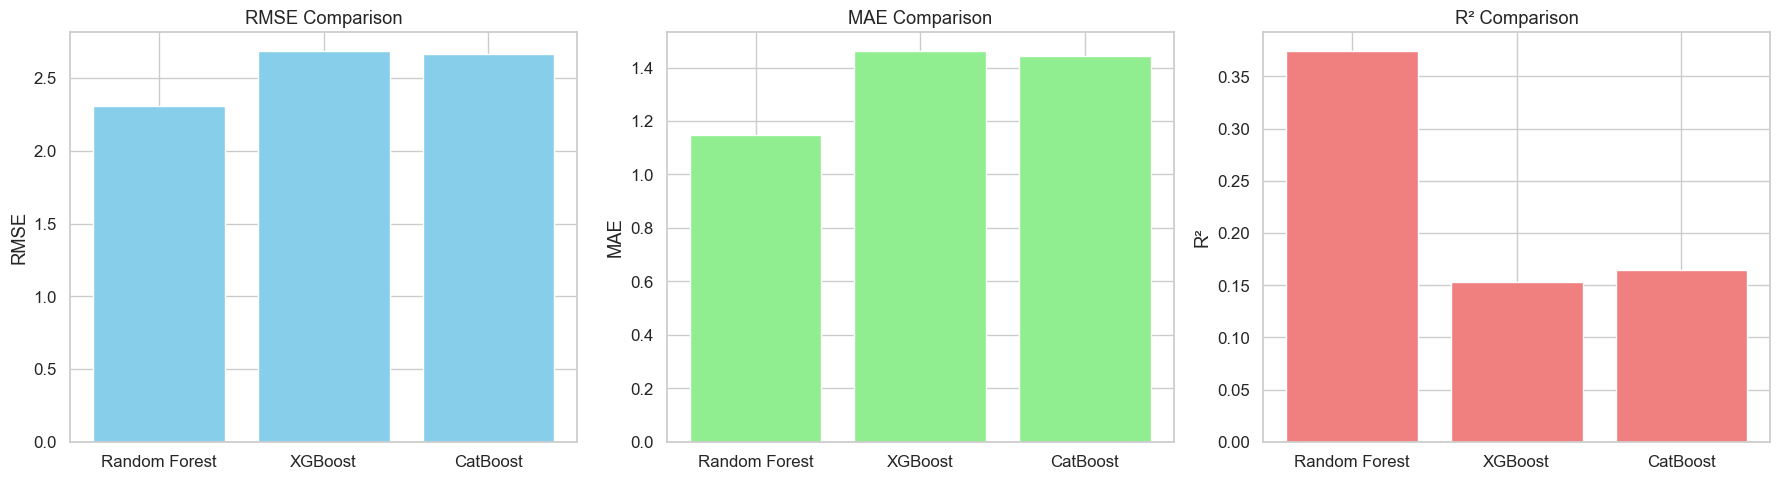

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Pr√©dictions des trois mod√®les (en supposant qu'elles sont d√©j√† calcul√©es)
rf_predictions = np.expm1(rf_model.predict(X_test))  # Random Forest
xgb_predictions = np.expm1(xgb_model.predict(X_test))  # XGBoost
catboost_predictions = np.expm1(catboost_model.predict(X_test))  # CatBoost

# Calcul des m√©triques pour chaque mod√®le
def get_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# M√©triques pour chaque mod√®le
rf_rmse, rf_mae, rf_r2 = get_metrics(y_test_raw, rf_predictions)
xgb_rmse, xgb_mae, xgb_r2 = get_metrics(y_test_raw, xgb_predictions)
catboost_rmse, catboost_mae, catboost_r2 = get_metrics(y_test_raw, catboost_predictions)

# Comparaison visuelle des r√©sultats
models = ['Random Forest', 'XGBoost', 'CatBoost']
rmse_values = [rf_rmse, xgb_rmse, catboost_rmse]
mae_values = [rf_mae, xgb_mae, catboost_mae]
r2_values = [rf_r2, xgb_r2, catboost_r2]

# Cr√©ation de la figure
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# RMSE - Comparaison des mod√®les
ax[0].bar(models, rmse_values, color='skyblue')
ax[0].set_title('RMSE Comparison')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)

# MAE - Comparaison des mod√®les
ax[1].bar(models, mae_values, color='lightgreen')
ax[1].set_title('MAE Comparison')
ax[1].set_ylabel('MAE')
ax[1].grid(True)

# R¬≤ - Comparaison des mod√®les
ax[2].bar(models, r2_values, color='lightcoral')
ax[2].set_title('R¬≤ Comparison')
ax[2].set_ylabel('R¬≤')
ax[2].grid(True)

# Ajustement de l'espacement
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Pr√©dictions des trois mod√®les (en supposant qu'elles sont d√©j√† calcul√©es)
rf_predictions = np.expm1(rf_model.predict(X_test_scaled))  # Random Forest
xgb_predictions = np.expm1(xgb_model.predict(X_test_scaled))  # XGBoost
catboost_predictions = np.expm1(catboost_model.predict(X_test_scaled))  # CatBoost

# Calcul des m√©triques pour chaque mod√®le
def get_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# M√©triques pour chaque mod√®le
rf_rmse, rf_mae, rf_r2 = get_metrics(y_test_raw, rf_predictions)
xgb_rmse, xgb_mae, xgb_r2 = get_metrics(y_test_raw, xgb_predictions)
catboost_rmse, catboost_mae, catboost_r2 = get_metrics(y_test_raw, catboost_predictions)

# Mod√®les et leurs m√©triques
models = ['Random Forest', 'XGBoost', 'CatBoost']
rmse_values = [rf_rmse, xgb_rmse, catboost_rmse]
mae_values = [rf_mae, xgb_mae, catboost_mae]
r2_values = [rf_r2, xgb_r2, catboost_r2]

# Position des barres pour chaque m√©trique
x = np.arange(len(models))  # La position des mod√®les
width = 0.2  # Largeur des barres

# Cr√©ation de la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour RMSE, MAE et R¬≤
bar1 = ax.bar(x - width, rmse_values, width, label='RMSE', color='skyblue')
bar2 = ax.bar(x, mae_values, width, label='MAE', color='lightgreen')
bar3 = ax.bar(x + width, r2_values, width, label='R¬≤', color='lightcoral')

# Ajout des √©tiquettes et titre
ax.set_xlabel('Mod√®les')
ax.set_ylabel('Valeur des m√©triques')
ax.set_title('Comparaison des mod√®les par m√©triques')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Affichage de la grille
ax.grid(True)

# Affichage du graphique
plt.tight_layout()
plt.show()


c:\Users\MEDIA TEK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 10 features, but RandomForestRegressor is expecting 7 features as input.

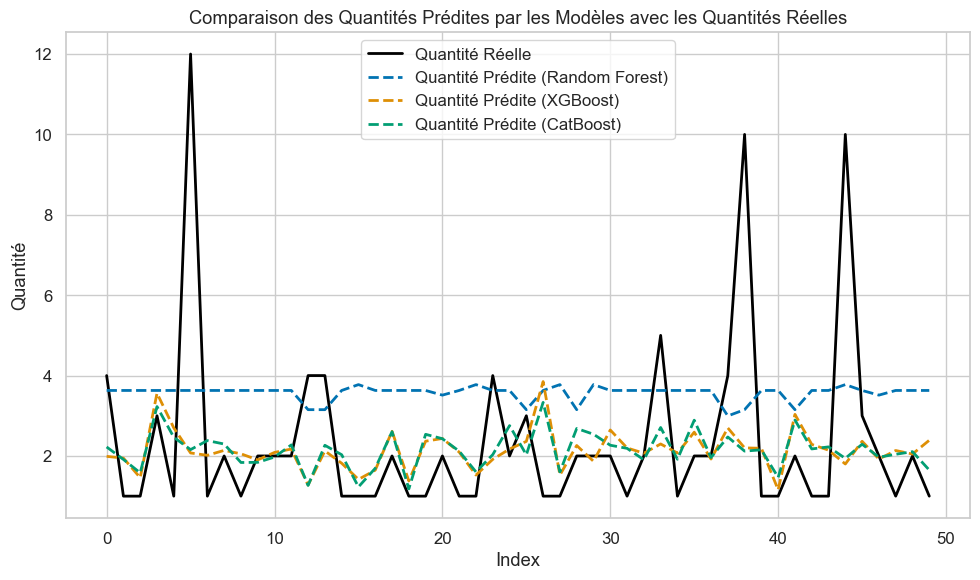

In [ ]:
import matplotlib.pyplot as plt

# Cr√©e un DataFrame avec les quantit√©s r√©elles et pr√©dites pour chaque mod√®le
results_comparison = pd.DataFrame({
    'Quantit√©_R√©elle': y_test_raw[:50],  # Quantit√© r√©elle (s√©lectionner les 50 premi√®res valeurs pour l'affichage)
    'Quantit√©_Predite_RF': rf_predictions[:50],  # Quantit√© pr√©dite par Random Forest
    'Quantit√©_Predite_XGB': xgb_predictions[:50],  # Quantit√© pr√©dite par XGBoost
    'Quantit√©_Predite_CB': catboost_predictions[:50]  # Quantit√© pr√©dite par CatBoost
})

# Cr√©ation du graphique
plt.figure(figsize=(10, 6))

# Tracer les courbes
plt.plot(results_comparison['Quantit√©_R√©elle'].values, label='Quantit√© R√©elle', color='black', linewidth=2)
plt.plot(results_comparison['Quantit√©_Predite_RF'].values, label='Quantit√© Pr√©dite (Random Forest)', linestyle='--', linewidth=2)
plt.plot(results_comparison['Quantit√©_Predite_XGB'].values, label='Quantit√© Pr√©dite (XGBoost)', linestyle='--', linewidth=2)
plt.plot(results_comparison['Quantit√©_Predite_CB'].values, label='Quantit√© Pr√©dite (CatBoost)', linestyle='--', linewidth=2)

# Ajouter un titre et des labels
plt.title('Comparaison des Quantit√©s Pr√©dites par les Mod√®les avec les Quantit√©s R√©elles')
plt.xlabel('Index')
plt.ylabel('Quantit√©')
plt.legend()

# Ajouter une grille pour une meilleure visibilit√©
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()


In [ ]:
# Liste des colonnes √† supprimer
colonnes_a_supprimer = ['Horizon', 'Fr√©quence', 'Article_Fournisseur','Co√ªt unitaire normalis√©','Quantit√©_kg','Nombre commandes normalis√©']
# Suppression des colonnes
achats = achats.drop(columns=colonnes_a_supprimer)

KeyError: "['Quantit√©_kg'] not found in axis"

In [ ]:
achats

N¬∞commande Code article                               Article   \
0        22000002     HSDR0007  SRTJ du E2:E13530/11/2021.              
1        22000002     P6311047         FUEL LOURD N¬∞2                   
2        22000003    M30511105          FILM THERMOR√âTRACTABLE NG 40¬µ   
3        22000003     HSDLI007         reparation palettes              
4        22000003     P9523007         Glasse de niv Type A N¬∞7 A/JTS   
...           ...          ...                                    ...   
23078    24900731    HSCLN0015         frais de participation           
23079    24900731    HSCLN0015         hebergement                      
23080    24900732    HSCLN0014         Abonnement salle de sport        
23081    24900733    HSCLN0032         disque dur externe SSD 512 go    
23082   922000015     P5611013         COLLIER DE SERRAGE 8/14          

                   Type article  Quantit√©  UM Date commande Date r√©ception  \
0      Produit mati√®re premi√®re       1.0  UN    2022-01-03     2022-01-12   
1             √ânergie/Carburant      30.0  TN    2022-01-04     2022-01-20   
2                       Service   45000.0  KG    2022-01-05     2022-01-30   
3                       Service    3402.0  UN    2022-01-03     2022-01-15   
4                      Mat√©riel       2.0  PC    2022-01-04     2022-01-10   
...                         ...       ...  ..           ...            ...   
23078                   Service       2.0  PI    2024-10-24     2024-10-31   
23079                   Service       2.0  PI    2024-10-24     2024-10-31   
23080                   Service       1.0  PI    2024-10-24     2024-10-31   
23081                  Mat√©riel       1.0  PI    2024-10-24     2024-10-31   
23082                  Mat√©riel      30.0  PI    2022-01-05     2022-01-08   

       conformit√©  Code Fournisseur  ... Respect_d√©lais Taux de Respect (%)  \
0               1           5006997  ...              1           94.117647   
1               1           5005182  ...              0           99.940982   
2               1           5006889  ...              0           95.000000   
3               1           5007369  ...              0           97.674419   
4               1           5005182  ...              1           99.940982   
...           ...               ...  ...            ...                 ...   
23078           1            559911  ...              1          100.000000   
23079           1            559911  ...              1          100.000000   
23080           1            559911  ...              1          100.000000   
23081           1            550645  ...              1           97.916667   
23082           1           5005182  ...              1           99.940982   

          Score  Cat√©gorie  Mois  Ann√©e  Jour  Type article_encoded  \
0      6.825537      Moyen     1   2022     3                     4   
1      6.886661      Moyen     1   2022     4                     7   
2      6.852617      Moyen     1   2022     5                     6   
3      6.935975      Moyen     1   2022     3                     6   
4      6.883973      Moyen     1   2022     4                     2   
...         ...        ...   ...    ...   ...                   ...   
23078  7.025381      Moyen    10   2024    24                     6   
23079  7.025392      Moyen    10   2024    24                     6   
23080  7.025380      Moyen    10   2024    24                     6   
23081  6.962161      Moyen    10   2024    24                     2   
23082  6.886969      Moyen     1   2022     5                     2   

      Code article_encoded  Code Fournisseur_encoded  
0                      481                       242  
1                     1540                        36  
2                      648                       223  
3                      477                       348  
4                     1816                        36  
...                    ...                  

In [ ]:
import joblib

joblib.dump(rf_model, 'rf_model.pkl')

joblib.dump(le, 'label_encoder.pkl')
joblib.dump(le_article,"label_encoder_article.pkl")



['label_encoder_fournisseur.pkl']

In [ ]:
import joblib

# Sauvegarde du mod√®le localement
joblib.dump(catboost_model, "catboost_model.pkl")
print("‚úÖ Mod√®le sauvegard√© localement sous 'catboost_model.pkl'")
#üíæ Sauvegarde des r√©sultats dans un fichier CSV
results_catboost.to_csv("resultats_catboost.csv", index=False)
print("‚úÖ R√©sultats sauvegard√©s dans 'resultats_catboost.csv'")

‚úÖ Mod√®le sauvegard√© localement sous 'catboost_model.pkl'
‚úÖ R√©sultats sauvegard√©s dans 'resultats_catboost.csv'


In [ ]:
# Sauvegarde du DataFrame dans un fichier CSV
achats.to_csv("dataframe_achats.csv", index=False)



print("‚úÖ DataFrame sauvegard√© dans 'dataframe_achats.csv'")



‚úÖ DataFrame sauvegard√© dans 'dataframe_achats.csv'


In [ ]:
achats.shape